In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib –rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
pd.options.display.max_rows = 30
pd.options.display.precision = 2

Data Link  : https://www.data.go.kr/data/15070340/fileData.do

In [5]:
df=pd.read_csv('도로교통공단_사망 교통사고 정보_20211231.csv',encoding='euc-kr')
df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1.10e+06,1.79e+06,128.58,36.13
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,9.02e+05,1.85e+06,126.41,36.62
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1.12e+06,1.97e+06,128.91,37.76
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,8.87e+05,1.61e+06,126.26,34.51
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,9.54e+05,1.92e+06,126.98,37.24


In [6]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumGothic')
print(plt.rcParams['font.family'])
['NanumGothic']

['NanumGothic']


['NanumGothic']

In [7]:
df.shape

(2816, 23)

In [8]:
df.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)',
       '발생위치Y(UTMK)', '경도', '위도'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   발생년          2816 non-null   int64  
 1   발생년월일시       2816 non-null   object 
 2   주야           2816 non-null   object 
 3   요일           2816 non-null   object 
 4   사망자수         2816 non-null   int64  
 5   부상자수         2816 non-null   int64  
 6   중상자수         2816 non-null   int64  
 7   경상자수         2816 non-null   int64  
 8   부상신고자수       2816 non-null   int64  
 9   발생지시도        2816 non-null   object 
 10  발생지시군구       2816 non-null   object 
 11  사고유형_대분류     2816 non-null   object 
 12  사고유형_중분류     2816 non-null   object 
 13  사고유형         2816 non-null   object 
 14  가해자법규위반      2816 non-null   object 
 15  도로형태_대분류     2816 non-null   object 
 16  도로형태         2816 non-null   object 
 17  가해자_당사자종별    2816 non-null   object 
 18  피해자_당사자종별    2816 non-null   object 
 19  발생위치X(

In [10]:
df['발생년월일시']=pd.to_datetime(df['발생년월일시'])

In [11]:
df.isnull().sum()

발생년            0
발생년월일시         0
주야             0
요일             0
사망자수           0
부상자수           0
중상자수           0
경상자수           0
부상신고자수         0
발생지시도          0
발생지시군구         0
사고유형_대분류       0
사고유형_중분류       0
사고유형           0
가해자법규위반        0
도로형태_대분류       0
도로형태           0
가해자_당사자종별      0
피해자_당사자종별      0
발생위치X(UTMK)    0
발생위치Y(UTMK)    0
경도             0
위도             0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
발생년,2816.0,2.02e+03,0.00,2.02e+03,2.02e+03,2.02e+03,2.02e+03,2.02e+03
사망자수,2816.0,1.04e+00,0.26,1.00e+00,1.00e+00,1.00e+00,1.00e+00,7.00e+00
부상자수,2816.0,4.71e-01,1.73,0.00e+00,0.00e+00,0.00e+00,0.00e+00,5.90e+01
중상자수,2816.0,1.94e-01,0.71,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.90e+01
경상자수,2816.0,2.59e-01,1.19,0.00e+00,0.00e+00,0.00e+00,0.00e+00,4.00e+01
부상신고자수,2816.0,1.85e-02,0.17,0.00e+00,0.00e+00,0.00e+00,0.00e+00,4.00e+00
발생위치X(UTMK),2816.0,1.01e+06,78077.02,7.53e+05,9.45e+05,9.77e+05,1.07e+06,1.30e+06
발생위치Y(UTMK),2816.0,1.82e+06,116932.85,1.47e+06,1.72e+06,1.83e+06,1.93e+06,2.05e+06
경도,2816.0,1.28e+02,0.87,1.25e+02,1.27e+02,1.27e+02,1.28e+02,1.31e+02
위도,2816.0,3.64e+01,1.06,3.32e+01,3.55e+01,3.64e+01,3.74e+01,3.84e+01


In [13]:
df.corr().round(2)

<ipython-input-13-1b12ae3e9d93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,발생년,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
발생년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
사망자수,NaN,1.00,0.25,0.25,0.22,0.03,-0.03,-0.03,-0.03,-0.03
부상자수,NaN,0.25,1.00,0.82,0.94,0.19,-0.02,-0.04,-0.02,-0.04
중상자수,NaN,0.25,0.82,1.00,0.59,0.07,-0.00,-0.06,-0.00,-0.06
경상자수,NaN,0.22,0.94,0.59,1.00,0.10,-0.02,-0.02,-0.02,-0.02
부상신고자수,NaN,0.03,0.19,0.07,0.10,1.00,-0.04,0.04,-0.04,0.04
발생위치X(UTMK),NaN,-0.03,-0.02,-0.00,-0.02,-0.04,1.00,-0.24,1.00,-0.24
발생위치Y(UTMK),NaN,-0.03,-0.04,-0.06,-0.02,0.04,-0.24,1.00,-0.24,1.00
경도,NaN,-0.03,-0.02,-0.00,-0.02,-0.04,1.00,-0.24,1.00,-0.24
위도,NaN,-0.03,-0.04,-0.06,-0.02,0.04,-0.24,1.00,-0.24,1.00


In [14]:
df.nunique()

발생년               1
발생년월일시         2369
주야                2
요일                7
사망자수              6
부상자수             17
중상자수             10
경상자수             13
부상신고자수            5
발생지시도            17
발생지시군구          207
사고유형_대분류          3
사고유형_중분류         14
사고유형             15
가해자법규위반           7
도로형태_대분류          4
도로형태             10
가해자_당사자종별        13
피해자_당사자종별        15
발생위치X(UTMK)    2797
발생위치Y(UTMK)    2808
경도             2814
위도             2816
dtype: int64

In [15]:
df_cat=df.select_dtypes(include='object')
df_cat

,주야,요일,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
0,야,금,경북,군위군,차대차,추돌,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차
1,주,금,충남,서산시,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음
2,주,금,강원,강릉시,차대차,측면충돌,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차
3,야,금,전남,진도군,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자
4,야,금,경기,수원시,차대사람,기타,기타,기타,단일로,기타단일로,승용차,보행자
...,...,...,...,...,...,...,...,...,...,...,...,...
2811,주,금,경북,경산시,차대차,정면충돌,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차
2812,주,금,제주,제주시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차
2813,야,금,강원,춘천시,차대사람,횡단중,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자
2814,야,금,경북,상주시,차대사람,횡단중,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,승용차,보행자


In [16]:
df_cat.iloc[:, 1]

0       금
1       금
2       금
3       금
4       금
       ..
2811    금
2812    금
2813    금
2814    금
2815    금
Name: 요일, Length: 2816, dtype: object

numeric cols value_counts

In [17]:
import warnings
warnings.filterwarnings("ignore")

array([[<Axes: title={'center': '발생년'}>,
        <Axes: title={'center': '발생년월일시'}>,
        <Axes: title={'center': '사망자수'}>],
       [<Axes: title={'center': '부상자수'}>,
        <Axes: title={'center': '중상자수'}>,
        <Axes: title={'center': '경상자수'}>],
       [<Axes: title={'center': '부상신고자수'}>,
        <Axes: title={'center': '발생위치X(UTMK)'}>,
        <Axes: title={'center': '발생위치Y(UTMK)'}>],
       [<Axes: title={'center': '경도'}>, <Axes: title={'center': '위도'}>,
        <Axes: >]], dtype=object)

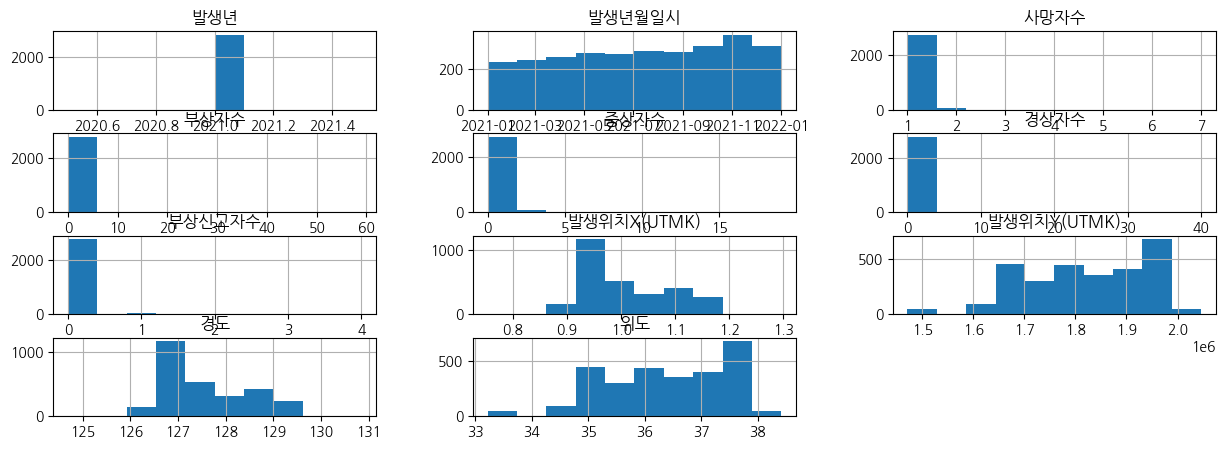

In [18]:
df.hist(figsize=(15,5))

categorical columns value counts

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

<Axes: >

<Axes: xlabel='주야', ylabel='count'>

<Axes: >

<Axes: xlabel='요일', ylabel='count'>

<Axes: >

<Axes: xlabel='발생지시도', ylabel='count'>

<Axes: >

<Axes: xlabel='발생지시군구', ylabel='count'>

<Axes: >

<Axes: xlabel='사고유형_대분류', ylabel='count'>

<Axes: >

<Axes: xlabel='사고유형_중분류', ylabel='count'>

<Axes: >

<Axes: xlabel='사고유형', ylabel='count'>

<Axes: >

<Axes: xlabel='가해자법규위반', ylabel='count'>

<Axes: >

<Axes: xlabel='도로형태_대분류', ylabel='count'>

<Axes: >

<Axes: xlabel='도로형태', ylabel='count'>

<Axes: >

<Axes: xlabel='가해자_당사자종별', ylabel='count'>

<Axes: >

<Axes: xlabel='피해자_당사자종별', ylabel='count'>

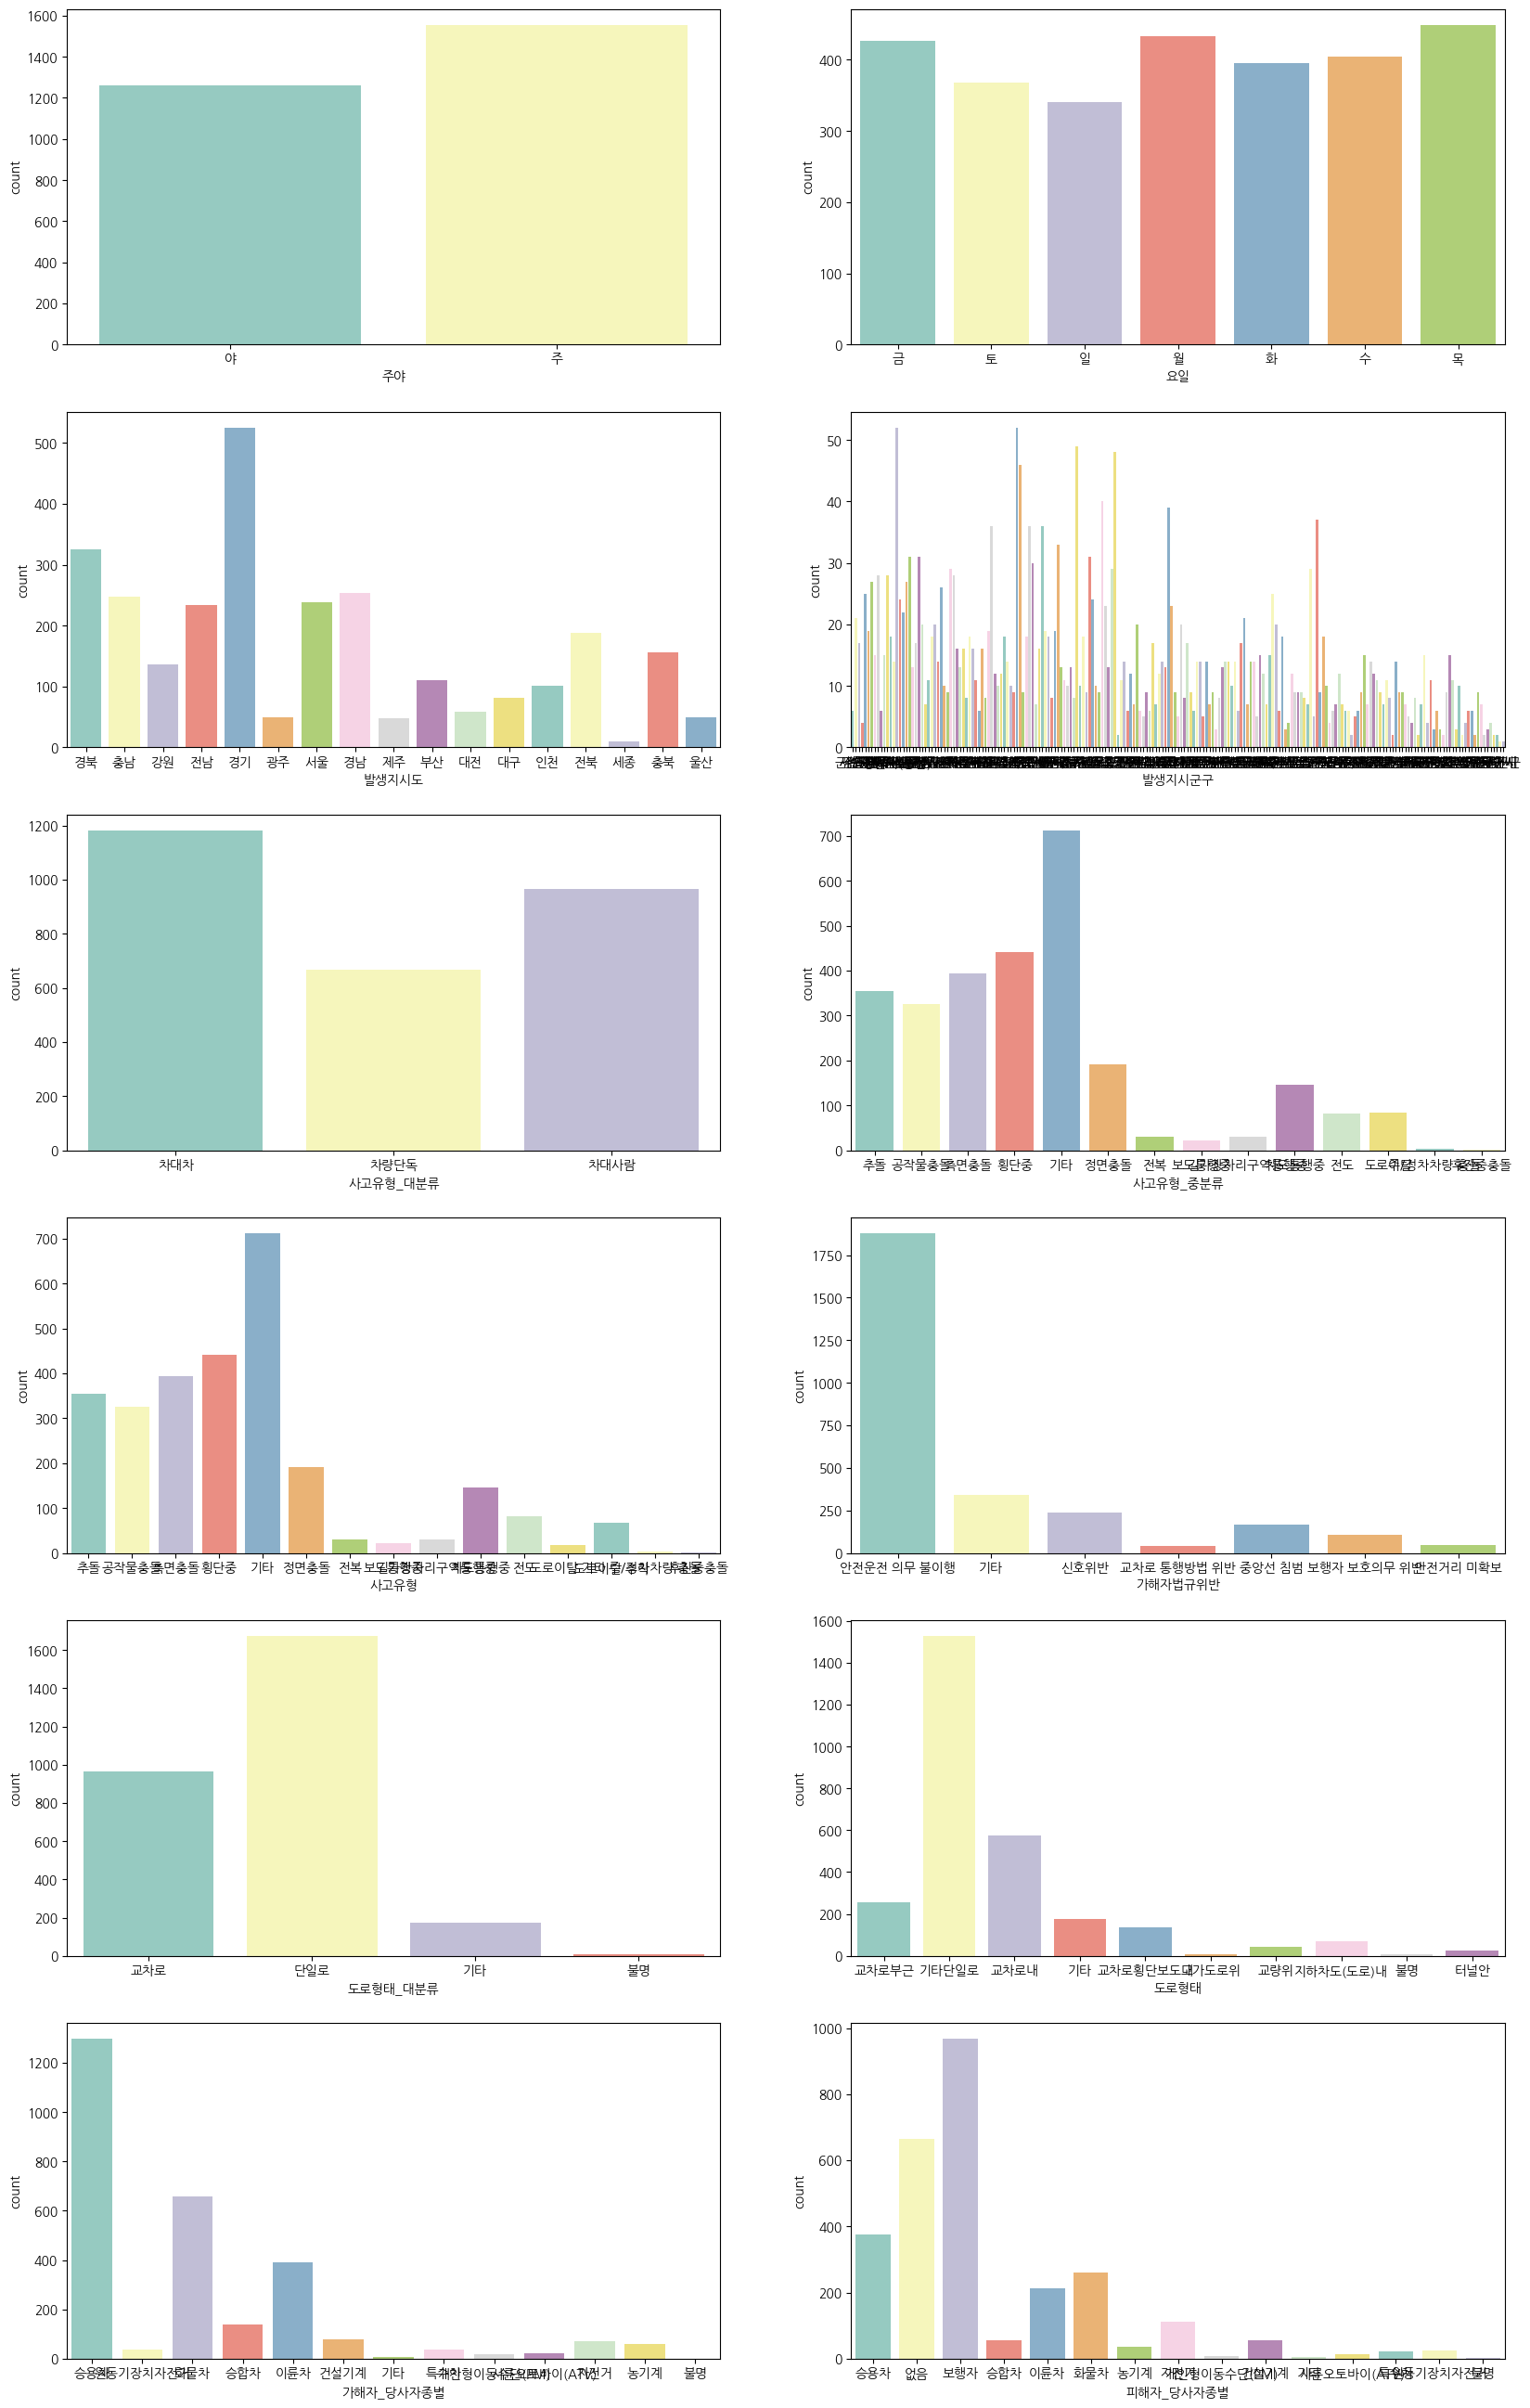

In [19]:
sns.color_palette('pastel')
fig=plt.figure(figsize=(20,140))
for index,col in enumerate(df_cat):
    plt.subplot(25,2,index+1)
    sns.countplot(x=col,data=df,palette='Set3')

In [20]:
df = df.drop(['발생년', '부상신고자수', '사망자수', '사고유형', '가해자법규위반', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)','발생위치Y(UTMK)', '경도', '위도'], axis=1)

In [21]:
df

,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
0,2021-01-01 03:00:00,야,금,3,0,3,경북,군위군,차대차,추돌,교차로,교차로부근
1,2021-01-01 09:00:00,주,금,0,0,0,충남,서산시,차량단독,공작물충돌,단일로,기타단일로
2,2021-01-01 15:00:00,주,금,0,0,0,강원,강릉시,차대차,측면충돌,교차로,교차로내
3,2021-01-01 19:00:00,야,금,0,0,0,전남,진도군,차대사람,횡단중,단일로,기타단일로
4,2021-01-01 21:00:00,야,금,0,0,0,경기,수원시,차대사람,기타,단일로,기타단일로
...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021-12-31 16:00:00,주,금,0,0,0,경북,경산시,차대차,정면충돌,교차로,교차로내
2812,2021-12-31 17:00:00,주,금,0,0,0,제주,제주시,차대차,추돌,단일로,기타단일로
2813,2021-12-31 18:00:00,야,금,0,0,0,강원,춘천시,차대사람,횡단중,단일로,기타단일로
2814,2021-12-31 19:00:00,야,금,0,0,0,경북,상주시,차대사람,횡단중,교차로,교차로횡단보도내


In [22]:
np.sort(df['경상자수'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 13, 18, 40])

In [23]:
df['경상자수'].value_counts().sort_index()

0     2425
1      261
2       73
3       30
4        7
5        3
6        2
7        5
8        3
10       2
13       3
18       1
40       1
Name: 경상자수, dtype: int64

Mean() Std() 대신에 일반방법으로 개산하기

In [24]:
(((df['경상자수'] - df['경상자수'].sum()/len(df['경상자수']))**2).sum())/len(df)

1.406887590392562

In [25]:
df['경상자수'].var()

1.4073873728403035

<Axes: xlabel='경상자수', ylabel='Count'>

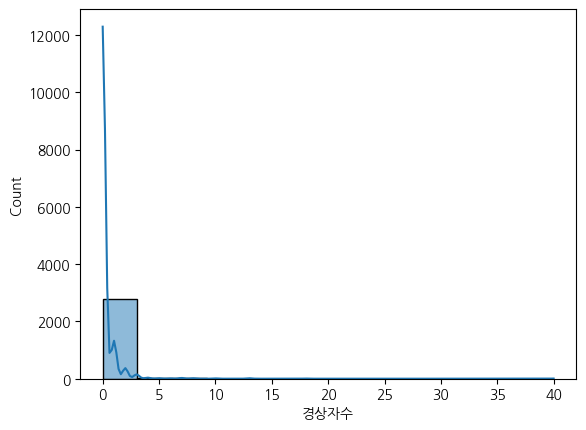

In [26]:
sns.histplot(df['경상자수'],kde=True)

In [27]:
df['발생지시도'].value_counts()

경기    525
경북    326
경남    254
충남    248
서울    238
전남    234
전북    188
충북    156
강원    137
부산    111
인천    102
대구     81
대전     59
울산     50
광주     49
제주     48
세종     10
Name: 발생지시도, dtype: int64

<Axes: xlabel='발생지시도', ylabel='count'>

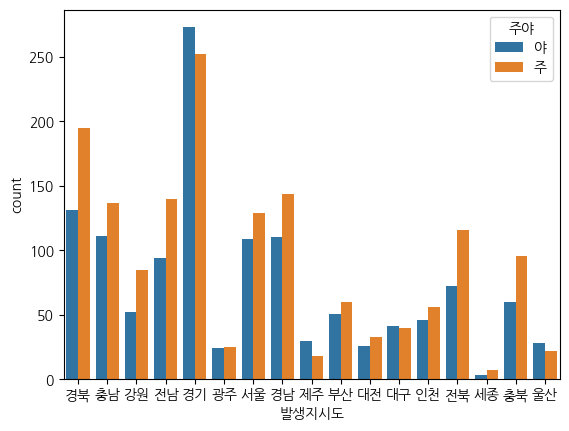

In [28]:
sns.countplot(x=df['발생지시도'],hue=df['주야'])

In [29]:
df['발생지시도'].max()
df['발생지시도'].min()

'충북'

'강원'

In [30]:
df['발생지시도'].value_counts().index
df['발생지시도'].value_counts().values

Index(['경기', '경북', '경남', '충남', '서울', '전남', '전북', '충북', '강원', '부산', '인천', '대구',
       '대전', '울산', '광주', '제주', '세종'],
      dtype='object')

array([525, 326, 254, 248, 238, 234, 188, 156, 137, 111, 102,  81,  59,
        50,  49,  48,  10])

In [31]:
df['발생지시도'].value_counts()['경북']

326

<Axes: >

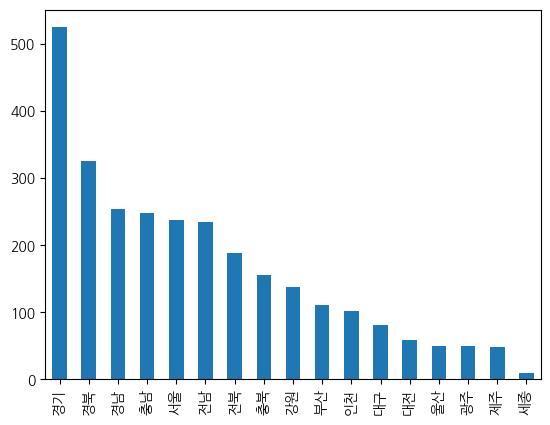

In [32]:
df['발생지시도'].value_counts().sort_values(ascending=False).plot(kind='bar')

한글로 'ㄱ' 가 첫째 'ㅊ'마지막 문자라서

In [33]:
df['발생지시도'].value_counts().sort_index()

강원    137
경기    525
경남    254
경북    326
광주     49
대구     81
대전     59
부산    111
서울    238
세종     10
울산     50
인천    102
전남    234
전북    188
제주     48
충남    248
충북    156
Name: 발생지시도, dtype: int64

GroupBy

In [34]:
df.groupby('발생지시도')['경상자수']

In [35]:
for g, sf in df.groupby('발생지시도'):
  sf.head(2)


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
2,2021-01-01 15:00:00,주,금,0,0,0,강원,강릉시,차대차,측면충돌,교차로,교차로내
50,2021-01-11 10:00:00,주,월,0,0,0,강원,홍천군,차량단독,전복,단일로,지하차도(도로)내


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
4,2021-01-01 21:00:00,야,금,0,0,0,경기,수원시,차대사람,기타,단일로,기타단일로
8,2021-01-02 02:00:00,야,토,0,0,0,경기,파주시,차량단독,전복,단일로,기타단일로


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
17,2021-01-04 00:00:00,야,월,0,0,0,경남,창원시(통합),차대차,정면충돌,단일로,기타단일로
26,2021-01-05 14:00:00,주,화,0,0,0,경남,김해시,차대차,기타,교차로,교차로부근


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
0,2021-01-01 03:00:00,야,금,3,0,3,경북,군위군,차대차,추돌,교차로,교차로부근
10,2021-01-02 09:00:00,주,토,1,1,0,경북,영주시,차대차,측면충돌,교차로,교차로내


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
7,2021-01-01 22:00:00,야,금,3,1,2,광주,광산구,차대차,정면충돌,교차로,교차로내
71,2021-01-15 02:00:00,야,금,0,0,0,광주,북구,차대차,추돌,단일로,기타단일로


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
46,2021-01-10 16:00:00,주,일,0,0,0,대구,수성구,차대차,정면충돌,교차로,교차로내
70,2021-01-15 01:00:00,야,금,0,0,0,대구,서구,차량단독,공작물충돌,단일로,기타단일로


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
44,2021-01-08 22:00:00,야,금,1,1,0,대전,유성구,차대차,추돌,단일로,기타단일로
166,2021-01-27 11:00:00,주,수,0,0,0,대전,대덕구,차대차,측면충돌,단일로,기타단일로


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
28,2021-01-05 21:00:00,야,화,0,0,0,부산,금정구,차대사람,기타,단일로,기타단일로
38,2021-01-07 15:00:00,주,목,0,0,0,부산,강서구,차대사람,횡단중,단일로,기타단일로


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
9,2021-01-02 07:00:00,주,토,0,0,0,서울,종로구,차대사람,횡단중,교차로,교차로횡단보도내
15,2021-01-03 12:00:00,주,일,0,0,0,서울,종로구,차대사람,횡단중,교차로,교차로횡단보도내


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
98,2021-01-19 14:00:00,주,화,0,0,0,세종,세종시,차대사람,기타,단일로,기타단일로
196,2021-02-01 08:00:00,주,월,5,5,0,세종,세종시,차량단독,전복,단일로,기타단일로


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
242,2021-02-07 19:00:00,야,일,0,0,0,울산,북구,차량단독,기타,기타,기타
304,2021-02-18 19:00:00,야,목,0,0,0,울산,남구,차대사람,횡단중,교차로,교차로횡단보도내


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
66,2021-01-14 13:00:00,주,목,2,1,1,인천,미추홀구,차대차,추돌,단일로,기타단일로
96,2021-01-19 05:00:00,야,화,1,0,1,인천,부평구,차대차,추돌,단일로,기타단일로


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
3,2021-01-01 19:00:00,야,금,0,0,0,전남,진도군,차대사람,횡단중,단일로,기타단일로
5,2021-01-01 21:00:00,야,금,0,0,0,전남,순천시,차대사람,기타,기타,기타


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
76,2021-01-15 18:00:00,야,금,0,0,0,전북,전주시,차대사람,기타,교차로,교차로내
122,2021-01-21 18:00:00,야,목,1,0,1,전북,익산시,차대차,추돌,교차로,교차로내


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
23,2021-01-05 05:00:00,야,화,0,0,0,제주,제주시,차량단독,공작물충돌,단일로,기타단일로
143,2021-01-24 18:00:00,야,일,0,0,0,제주,서귀포시,차대차,기타,단일로,기타단일로


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
1,2021-01-01 09:00:00,주,금,0,0,0,충남,서산시,차량단독,공작물충돌,단일로,기타단일로
6,2021-01-01 22:00:00,야,금,0,0,0,충남,천안시,차대사람,횡단중,교차로,교차로부근


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
105,2021-01-20 06:00:00,주,수,1,0,1,충북,청주시,차대차,추돌,단일로,기타단일로
115,2021-01-21 10:00:00,주,목,2,1,1,충북,청주시,차대차,추돌,단일로,교량위


In [36]:
df.groupby('발생지시도')['부상자수'].value_counts()

발생지시도  부상자수
강원     0       98
       1       23
       2        7
       3        4
       4        2
               ..
충북     3        4
       4        4
       8        2
       7        1
       16       1
Name: 부상자수, Length: 107, dtype: int64

In [37]:
for g, sf in df.groupby('발생지시도'):
  print('group by', g)
  sf['부상자수'].value_counts()
  print('*'*100)

group by 강원


0     98
1     23
2      7
3      4
5      2
4      2
15     1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 경기


0     394
1      83
2      20
3      13
4       5
5       5
8       2
7       2
10      1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 경남


0     206
1      32
2       7
3       6
27      1
4       1
5       1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 경북


0     244
1      56
2      14
3       6
4       3
7       1
14      1
10      1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 광주


0    41
1     5
3     2
2     1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 대구


0     65
1      7
2      6
3      2
12     1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 대전


0    42
1    12
2     4
3     1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 부산


0    89
1    16
2     3
3     2
6     1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 서울


0    199
1     21
2     11
3      5
8      1
5      1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 세종


0    8
5    1
2    1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 울산


0    43
1     3
4     2
2     2
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 인천


0    79
1    17
2     3
3     2
5     1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 전남


0     183
1      29
2      10
3       5
4       3
6       1
14      1
16      1
5       1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 전북


0     147
1      25
2       8
4       2
3       1
5       1
13      1
8       1
6       1
12      1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 제주


0     36
1      6
3      2
6      1
59     1
5      1
2      1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 충남


0     185
1      35
2      17
3       8
5       2
10      1
Name: 부상자수, dtype: int64

****************************************************************************************************
group by 충북


0     111
1      26
2       7
4       4
3       4
8       2
7       1
16      1
Name: 부상자수, dtype: int64

****************************************************************************************************


In [38]:
df.groupby('발생지시도')['부상자수'].value_counts().unstack()
df.groupby('발생지시도')['부상자수'].value_counts().unstack().fillna(0).astype(int)

부상자수,0,1,2,3,4,5,6,7,8,10,12,13,14,15,16,27,59
발생지시도,,,,,,,,,,,,,,,,,
강원,98.0,23.0,7.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
경기,394.0,83.0,20.0,13.0,5.0,5.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
경남,206.0,32.0,7.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
경북,244.0,56.0,14.0,6.0,3.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
광주,41.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
대구,65.0,7.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
대전,42.0,12.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
부산,89.0,16.0,3.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
서울,199.0,21.0,11.0,5.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


부상자수,0,1,2,3,4,5,6,7,8,10,12,13,14,15,16,27,59
발생지시도,,,,,,,,,,,,,,,,,
강원,98,23,7,4,2,2,0,0,0,0,0,0,0,1,0,0,0
경기,394,83,20,13,5,5,0,2,2,1,0,0,0,0,0,0,0
경남,206,32,7,6,1,1,0,0,0,0,0,0,0,0,0,1,0
경북,244,56,14,6,3,0,0,1,0,1,0,0,1,0,0,0,0
광주,41,5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0
대구,65,7,6,2,0,0,0,0,0,0,1,0,0,0,0,0,0
대전,42,12,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
부산,89,16,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0
서울,199,21,11,5,0,1,0,0,1,0,0,0,0,0,0,0,0


In [39]:
df.groupby('발생지시도')['부상자수'].value_counts().unstack().fillna(0).astype(int).style.background_gradient(axis=0)


부상자수,0,1,2,3,4,5,6,7,8,10,12,13,14,15,16,27,59
발생지시도,,,,,,,,,,,,,,,,,
강원,98,23,7,4,2,2,0,0,0,0,0,0,0,1,0,0,0
경기,394,83,20,13,5,5,0,2,2,1,0,0,0,0,0,0,0
경남,206,32,7,6,1,1,0,0,0,0,0,0,0,0,0,1,0
경북,244,56,14,6,3,0,0,1,0,1,0,0,1,0,0,0,0
광주,41,5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0
대구,65,7,6,2,0,0,0,0,0,0,1,0,0,0,0,0,0
대전,42,12,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
부산,89,16,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0
서울,199,21,11,5,0,1,0,0,1,0,0,0,0,0,0,0,0


위에 있는 테이블 쉽게 만들 수 있는 방법 **CROSSTAB**

In [40]:
pd.crosstab(df['발생지시도'], df['부상자수'])


부상자수,0,1,2,3,4,5,6,7,8,10,12,13,14,15,16,27,59
발생지시도,,,,,,,,,,,,,,,,,
강원,98,23,7,4,2,2,0,0,0,0,0,0,0,1,0,0,0
경기,394,83,20,13,5,5,0,2,2,1,0,0,0,0,0,0,0
경남,206,32,7,6,1,1,0,0,0,0,0,0,0,0,0,1,0
경북,244,56,14,6,3,0,0,1,0,1,0,0,1,0,0,0,0
광주,41,5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0
대구,65,7,6,2,0,0,0,0,0,0,1,0,0,0,0,0,0
대전,42,12,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
부산,89,16,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0
서울,199,21,11,5,0,1,0,0,1,0,0,0,0,0,0,0,0


In [41]:
df.pivot_table(index='발생지시도', columns='도로형태', values = '부상자수', aggfunc='sum').fillna(0)

도로형태,고가도로위,교량위,교차로내,교차로부근,교차로횡단보도내,기타,기타단일로,불명,지하차도(도로)내,터널안
발생지시도,,,,,,,,,,
강원,0.0,2.0,9.0,6.0,4.0,3.0,53.0,0.0,0.0,5.0
경기,0.0,6.0,50.0,24.0,0.0,23.0,140.0,0.0,3.0,1.0
경남,0.0,2.0,22.0,9.0,0.0,6.0,56.0,0.0,1.0,4.0
경북,1.0,2.0,24.0,11.0,1.0,6.0,94.0,0.0,4.0,2.0
광주,0.0,0.0,8.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
대구,0.0,1.0,5.0,5.0,0.0,0.0,26.0,0.0,0.0,0.0
대전,0.0,0.0,7.0,1.0,1.0,2.0,11.0,0.0,0.0,1.0
부산,0.0,3.0,12.0,2.0,0.0,0.0,14.0,0.0,3.0,0.0
서울,0.0,2.0,16.0,5.0,2.0,7.0,38.0,0.0,0.0,1.0


셋째 방법  **PIVOT TABLE**

In [42]:
df.pivot_table(index=['발생지시도'], columns=['부상자수'], values=['요일'],
aggfunc='count').fillna(0).astype(int)

요일                                                   
부상자수    0   1   2   3  4  5  6  7  8  10 12 13 14 15 16 27 59
발생지시도                                                        
강원      98  23   7   4  2  2  0  0  0  0  0  0  0  1  0  0  0
경기     394  83  20  13  5  5  0  2  2  1  0  0  0  0  0  0  0
경남     206  32   7   6  1  1  0  0  0  0  0  0  0  0  0  1  0
경북     244  56  14   6  3  0  0  1  0  1  0  0  1  0  0  0  0
광주      41   5   1   2  0  0  0  0  0  0  0  0  0  0  0  0  0
대구      65   7   6   2  0  0  0  0  0  0  1  0  0  0  0  0  0
대전      42  12   4   1  0  0  0  0  0  0  0  0  0  0  0  0  0
부산      89  16   3   2  0  0  1  0  0  0  0  0  0  0  0  0  0
서울     199  21  11   5  0  1  0  0  1  0  0  0  0  0  0  0  0
세종       8   0   1   0  0  1  0  0  0  0  0  0  0  0  0  0  0
울산      43   3   2   0  2  0  0  0  0  0  0  0  0  0  0  0  0
인천      79  17   3   2  0  1  0  0  0  0  0  0  0  0  0  0  0
전남     183  29  10   5  3  1  1  0  0  0  0  0  1  0  1  0  0
전북     147  25   8   1  2  1  1  0  1  0  1  1  0  0  0  0  0
제주      36   6   1   2  0  1  1  0  0  0  0  0  0  0  0  0  1
충남     185  35  17   8  0  2  0  0  0  1  0  0  0  0  0  0  0
충북     111  26   7   4  4  0  0  1  2  0  0  0  0  0  1  0  0

<Axes: xlabel='발생지시도'>

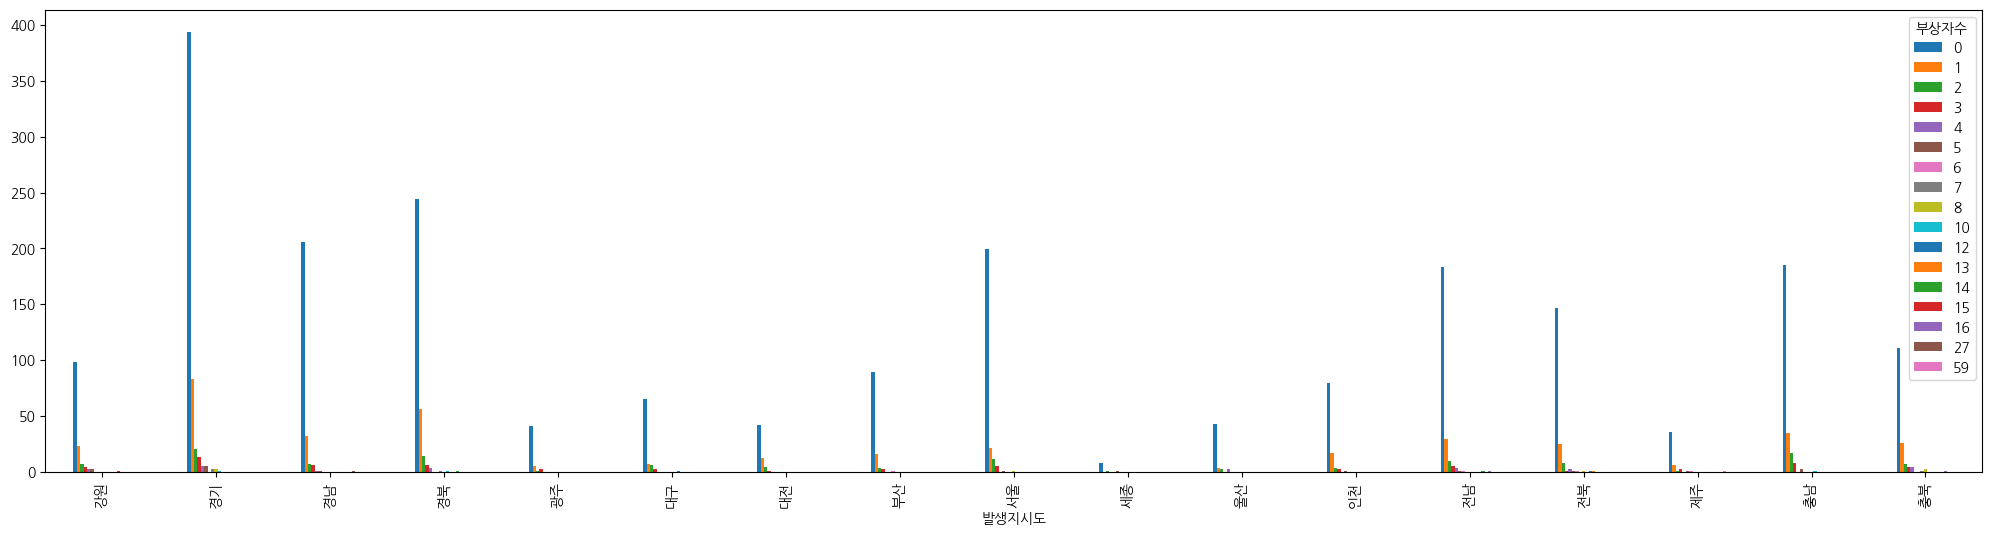

In [43]:
df.groupby('발생지시도')['부상자수'].value_counts().unstack().plot(kind='bar', figsize=(25,6))


In [44]:
cross = df.pivot_table(index=['발생지시도'], columns=['부상자수'], values=['요일'],
aggfunc='count').fillna(0)

In [45]:
cross.T['강원'].value_counts()

0.0     10
2.0      2
98.0     1
23.0     1
7.0      1
4.0      1
1.0      1
Name: 강원, dtype: int64

In [46]:
cross.T['강원'].value_counts(normalize=True)

0.0     0.59
2.0     0.12
98.0    0.06
23.0    0.06
7.0     0.06
4.0     0.06
1.0     0.06
Name: 강원, dtype: float64

In [47]:
df.groupby('발생지시도')['부상자수'].sum()

발생지시도
강원     82
경기    247
경남    100
경북    145
광주     13
대구     37
대전     23
부산     34
서울     71
세종      7
울산     15
인천     34
전남    117
전북     96
제주     84
충남    113
충북    107
Name: 부상자수, dtype: int64

In [48]:
df.pivot_table(values=['부상자수'], index =['발생지시도'], aggfunc=sum)


,부상자수
발생지시도,
강원,82
경기,247
경남,100
경북,145
광주,13
대구,37
대전,23
부산,34
서울,71


In [49]:
df['발생지시도'].value_counts().sort_values()
df['발생지시도'].value_counts().sort_index()


세종     10
제주     48
광주     49
울산     50
대전     59
대구     81
인천    102
부산    111
강원    137
충북    156
전북    188
전남    234
서울    238
충남    248
경남    254
경북    326
경기    525
Name: 발생지시도, dtype: int64

강원    137
경기    525
경남    254
경북    326
광주     49
대구     81
대전     59
부산    111
서울    238
세종     10
울산     50
인천    102
전남    234
전북    188
제주     48
충남    248
충북    156
Name: 발생지시도, dtype: int64

In [50]:
df.groupby(['발생지시도', '요일'])['부상자수'].sum().unstack().fillna(0).astype(int)

요일,금,목,수,월,일,토,화
발생지시도,,,,,,,
강원,15,10,4,7,20,6,20
경기,26,52,29,60,40,25,15
경남,15,8,12,7,2,23,33
경북,32,13,40,17,16,9,18
광주,6,0,1,1,1,4,0
대구,0,2,1,21,7,2,4
대전,6,3,3,3,5,1,2
부산,8,7,2,4,3,6,4
서울,11,16,3,16,6,15,4


<Axes: xlabel='발생지시도'>

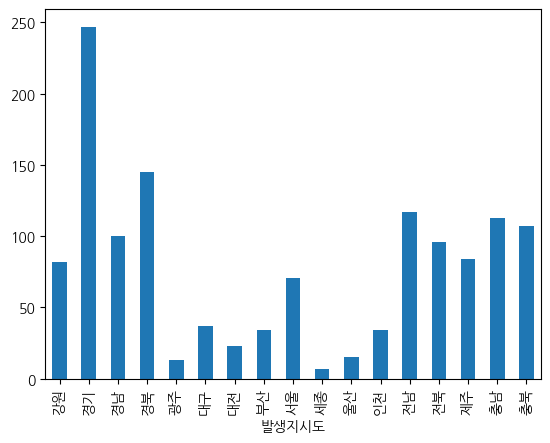

In [51]:
df.groupby('발생지시도')['부상자수'].sum().plot(kind='bar')

## PIVOT TABLE로

In [52]:
df.pivot_table(values=['부상자수'], index =['발생지시도', '요일'], aggfunc=sum).unstack().fillna(0).astype(int)


부상자수                        
요일       금   목   수   월   일   토   화
발생지시도                             
강원      15  10   4   7  20   6  20
경기      26  52  29  60  40  25  15
경남      15   8  12   7   2  23  33
경북      32  13  40  17  16   9  18
광주       6   0   1   1   1   4   0
대구       0   2   1  21   7   2   4
대전       6   3   3   3   5   1   2
부산       8   7   2   4   3   6   4
서울      11  16   3  16   6  15   4
세종       0   0   0   5   0   2   0
울산       0   4   0   2   0   5   4
인천       4   5   5   9   2   2   7
전남      21  10  14  11   9  12  40
전북      23   5  29  16   0  13  10
제주       1   3   2   3   7   9  59
충남      15  14  25  16  11  16  16
충북      12  34  12   3   4  11  31

In [53]:
df.pivot_table(values=['부상자수'], index =['발생지시도'], columns =['요일'], aggfunc=sum)


부상자수                                    
요일        금     목     수     월     일     토     화
발생지시도                                          
강원     15.0  10.0   4.0   7.0  20.0   6.0  20.0
경기     26.0  52.0  29.0  60.0  40.0  25.0  15.0
경남     15.0   8.0  12.0   7.0   2.0  23.0  33.0
경북     32.0  13.0  40.0  17.0  16.0   9.0  18.0
광주      6.0   0.0   1.0   1.0   1.0   4.0   0.0
대구      0.0   2.0   1.0  21.0   7.0   2.0   4.0
대전      6.0   3.0   3.0   3.0   5.0   1.0   2.0
부산      8.0   7.0   2.0   4.0   3.0   6.0   4.0
서울     11.0  16.0   3.0  16.0   6.0  15.0   4.0
세종      NaN   0.0   0.0   5.0   NaN   2.0   0.0
울산      0.0   4.0   0.0   2.0   0.0   5.0   4.0
인천      4.0   5.0   5.0   9.0   2.0   2.0   7.0
전남     21.0  10.0  14.0  11.0   9.0  12.0  40.0
전북     23.0   5.0  29.0  16.0   0.0  13.0  10.0
제주      1.0   3.0   2.0   3.0   7.0   9.0  59.0
충남     15.0  14.0  25.0  16.0  11.0  16.0  16.0
충북     12.0  34.0  12.0   3.0   4.0  11.0  31.0

# SIZE FUNCTION

In [54]:
df.groupby('발생지시도')['부상자수'].size()


발생지시도
강원    137
경기    525
경남    254
경북    326
광주     49
대구     81
대전     59
부산    111
서울    238
세종     10
울산     50
인천    102
전남    234
전북    188
제주     48
충남    248
충북    156
Name: 부상자수, dtype: int64

In [55]:
df.groupby('발생지시도')['부상자수'].size().sort_values(ascending=False)

발생지시도
경기    525
경북    326
경남    254
충남    248
서울    238
전남    234
전북    188
충북    156
강원    137
부산    111
인천    102
대구     81
대전     59
울산     50
광주     49
제주     48
세종     10
Name: 부상자수, dtype: int64

## AGGREGATION FUNCTION

In [56]:
df.groupby('발생지시도')['부상자수'].agg(['sum', 'count', 'median', 'max', 'min', 'mean', 'var', 'std'])

,sum,count,median,max,min,mean,var,std
발생지시도,,,,,,,,
강원,82,137,0.0,15,0,0.60,2.54,1.59
경기,247,525,0.0,10,0,0.47,1.33,1.15
경남,100,254,0.0,27,0,0.39,3.34,1.83
경북,145,326,0.0,14,0,0.44,1.52,1.23
광주,13,49,0.0,3,0,0.27,0.49,0.70
대구,37,81,0.0,12,0,0.46,2.20,1.48
대전,23,59,0.0,3,0,0.39,0.48,0.70
부산,34,111,0.0,6,0,0.31,0.65,0.81
서울,71,238,0.0,8,0,0.30,0.75,0.87


**[SORT]** INDEX

In [57]:
tf = df['발생지시도'].value_counts().reset_index()

In [58]:
tf.rename({'index':'도시'},axis=1,inplace=True)

In [59]:
tf.columns = ['시도', '회수']

In [60]:
tf['시도'].sort_values()

8     강원
0     경기
2     경남
1     경북
14    광주
11    대구
12    대전
9     부산
4     서울
16    세종
13    울산
10    인천
5     전남
6     전북
15    제주
3     충남
7     충북
Name: 시도, dtype: object

In [61]:
tf['회수'].sort_values(ascending=False)

0     525
1     326
2     254
3     248
4     238
5     234
6     188
7     156
8     137
9     111
10    102
11     81
12     59
13     50
14     49
15     48
16     10
Name: 회수, dtype: int64

In [62]:
tf.sort_values(['회수','시도'],ascending=[False,False])

,시도,회수
0,경기,525
1,경북,326
2,경남,254
3,충남,248
4,서울,238
5,전남,234
6,전북,188
7,충북,156
8,강원,137
9,부산,111


In [63]:
tf.sort_values('시도').iloc[:,0]

8     강원
0     경기
2     경남
1     경북
14    광주
11    대구
12    대전
9     부산
4     서울
16    세종
13    울산
10    인천
5     전남
6     전북
15    제주
3     충남
7     충북
Name: 시도, dtype: object

COLUMNS 명

In [64]:
ta = df[['발생지시도', '부상자수']]

In [65]:
ta = ta.rename(columns={'발생지시도': '시도', '부상자수':'부상'})
ta.columns

Index(['시도', '부상'], dtype='object')

In [66]:
ta.columns= ['발생지시도', '부상자수']
ta.columns

Index(['발생지시도', '부상자수'], dtype='object')

In [67]:
ta.columns = ta.columns.str.replace('발생지', '')
ta.columns

Index(['시도', '부상자수'], dtype='object')

In [68]:
ta.columns=ta.columns.str.replace('시도','발생지')
ta.columns

Index(['발생지', '부상자수'], dtype='object')

In [69]:
ta.columns= ['발생지시도', '부상자수']
ta.columns.str.replace('발생지|자수', repr)

Index(['<re.Match object; span=(0, 3), match='발생지'>시도', '부상<re.Match object; span=(2, 4), match='자수'>'], dtype='object')

In [70]:
ta.columns

Index(['발생지시도', '부상자수'], dtype='object')

In [71]:
ta.columns= ta.columns.str.replace('발생지|자수', '')
ta.columns

Index(['시도', '부상'], dtype='object')

In [72]:
pd.Series(['foo', 'fuz', np.nan]).str.replace('f', repr)
pd.Series(['foo', 'fuz', np.nan]).str.replace('f', '')


0    <re.Match object; span=(0, 1), match='f'>oo
1    <re.Match object; span=(0, 1), match='f'>uz
2                                            NaN
dtype: object

0     oo
1     uz
2    NaN
dtype: object

In [73]:
ta.columns= ['발생지시도', '부상자수']
ta

,발생지시도,부상자수
0,경북,3
1,충남,0
2,강원,0
3,전남,0
4,경기,0
...,...,...
2811,경북,0
2812,제주,0
2813,강원,0
2814,경북,0


새로운 자료 만들고

In [74]:
tf = pd.DataFrame({'학생': np.random.choice(range(1, 11), 10, replace=False),
'국어': np.random.randint(70, 101,10),
'영어': np.random.randint(60, 101,10)})
tf

,학생,국어,영어
0,1,85,77
1,9,78,75
2,2,71,88
3,7,94,82
4,4,87,78
5,3,85,100
6,8,96,83
7,6,85,78
8,5,74,67
9,10,100,70


In [75]:
tf.set_index('학생',inplace=True)

In [76]:
tf.sort_index()

,국어,영어
학생,,
1,85,77
2,71,88
3,85,100
4,87,78
5,74,67
6,85,78
7,94,82
8,96,83
9,78,75


In [77]:
tf.sort_values('국어',ascending=False)

,국어,영어
학생,,
10,100,70
8,96,83
7,94,82
4,87,78
1,85,77
3,85,100
6,85,78
9,78,75
5,74,67


In [78]:
pip install Faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from faker import Faker
fake=Faker('ko_KR')

In [80]:
names = [fake.name() for _ in range(10)]

In [81]:
names

['이미정', '윤지혜', '박경수', '이동현', '최광수', '김미영', '김서현', '김성민', '김지원', '박영식']

In [82]:
tf.index=names

In [83]:
tf.sort_index()

,국어,영어
김미영,85,100
김서현,96,83
김성민,85,78
김지원,74,67
박경수,71,88
박영식,100,70
윤지혜,78,75
이동현,94,82
이미정,85,77
최광수,87,78


In [84]:
tf.reset_index()

,index,국어,영어
0,이미정,85,77
1,윤지혜,78,75
2,박경수,71,88
3,이동현,94,82
4,최광수,87,78
5,김미영,85,100
6,김서현,96,83
7,김성민,85,78
8,김지원,74,67
9,박영식,100,70


**형태** **변환**

## Object을 Category로  형태로 바꾸면 얻을 수 있는 장점

In [85]:
df['부상자수'].dtypes

dtype('int64')

In [86]:
df['부상자수']=df['부상자수'].astype(float)

In [87]:
df['부상자수'].dtypes

dtype('float64')

In [88]:
for col in df.columns:
  if df[col].dtype == int:

    print(col)
    df[col] = df[col].astype(float)

중상자수
경상자수


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   발생년월일시    2816 non-null   datetime64[ns]
 1   주야        2816 non-null   object        
 2   요일        2816 non-null   object        
 3   부상자수      2816 non-null   float64       
 4   중상자수      2816 non-null   float64       
 5   경상자수      2816 non-null   float64       
 6   발생지시도     2816 non-null   object        
 7   발생지시군구    2816 non-null   object        
 8   사고유형_대분류  2816 non-null   object        
 9   사고유형_중분류  2816 non-null   object        
 10  도로형태_대분류  2816 non-null   object        
 11  도로형태      2816 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 264.1+ KB


In [90]:
for col in df.columns:
  if df[col].dtype == object:
    print(col)
    df[col] = df[col].astype('category')


주야
요일
발생지시도
발생지시군구
사고유형_대분류
사고유형_중분류
도로형태_대분류
도로형태


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   발생년월일시    2816 non-null   datetime64[ns]
 1   주야        2816 non-null   category      
 2   요일        2816 non-null   category      
 3   부상자수      2816 non-null   float64       
 4   중상자수      2816 non-null   float64       
 5   경상자수      2816 non-null   float64       
 6   발생지시도     2816 non-null   category      
 7   발생지시군구    2816 non-null   category      
 8   사고유형_대분류  2816 non-null   category      
 9   사고유형_중분류  2816 non-null   category      
 10  도로형태_대분류  2816 non-null   category      
 11  도로형태      2816 non-null   category      
dtypes: category(8), datetime64[ns](1), float64(3)
memory usage: 125.1 KB


In [92]:
df.발생지시도

0       경북
1       충남
2       강원
3       전남
4       경기
        ..
2811    경북
2812    제주
2813    강원
2814    경북
2815    강원
Name: 발생지시도, Length: 2816, dtype: category
Categories (17, object): ['강원', '경기', '경남', '경북', ..., '전북', '제주', '충남', '충북']

In [93]:
sorted(df.발생지시도.unique())

['강원',
 '경기',
 '경남',
 '경북',
 '광주',
 '대구',
 '대전',
 '부산',
 '서울',
 '세종',
 '울산',
 '인천',
 '전남',
 '전북',
 '제주',
 '충남',
 '충북']

## *발생지시도 이름들을 숫자로 바꾸다 (다음에 데이터 분석할 때 꼭 알아야 한다.)*

In [94]:
df.발생지시도.cat.codes
df.발생지시도.cat.codes.unique()

0        3
1       15
2        0
3       12
4        1
        ..
2811     3
2812    14
2813     0
2814     3
2815     0
Length: 2816, dtype: int8

array([ 3, 15,  0, 12,  1,  4,  8,  2, 14,  7,  6,  5, 11, 13,  9, 16, 10],
      dtype=int8)

In [95]:
zip(df.발생지시도, df.발생지시도.cat.codes)

In [96]:
dict(zip(df.발생지시도, df.발생지시도.cat.codes))

{'경북': 3,
 '충남': 15,
 '강원': 0,
 '전남': 12,
 '경기': 1,
 '광주': 4,
 '서울': 8,
 '경남': 2,
 '제주': 14,
 '부산': 7,
 '대전': 6,
 '대구': 5,
 '인천': 11,
 '전북': 13,
 '세종': 9,
 '충북': 16,
 '울산': 10}

In [97]:
dict(df.dtypes).keys()

dict_keys(['발생년월일시', '주야', '요일', '부상자수', '중상자수', '경상자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '도로형태_대분류', '도로형태'])

In [98]:
dict(df.dtypes).values()

dict_values([dtype('<M8[ns]'), CategoricalDtype(categories=['야', '주'], ordered=False), CategoricalDtype(categories=['금', '목', '수', '월', '일', '토', '화'], ordered=False), dtype('float64'), dtype('float64'), dtype('float64'), CategoricalDtype(categories=['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종',
                  '울산', '인천', '전남', '전북', '제주', '충남', '충북'],
, ordered=False), CategoricalDtype(categories=['가평군', '강남구', '강동구', '강릉시', '강북구', '강서구', '강진군', '강화군',
                  '거제시', '거창군',
                  ...
                  '함평군', '합천군', '해남군', '해운대구', '홍성군', '홍천군', '화성시', '화순군',
                  '화천군', '횡성군'],
, ordered=False), CategoricalDtype(categories=['차대사람', '차대차', '차량단독'], ordered=False), CategoricalDtype(categories=['공작물충돌', '기타', '길가장자리구역통행중', '도로이탈', '보도통행중', '전도', '전복',
                  '정면충돌', '주/정차차량 충돌', '차도통행중', '추돌', '측면충돌', '횡단중', '후진중충돌'],
, ordered=False), CategoricalDtype(categories=['교차로', '기타', '단일로', '불명'], ordered=False), CategoricalDtype(cat

In [99]:
[key for key in dict(df.dtypes).keys() if dict(df.dtypes)[key] in ['float64', 'int64']]


['부상자수', '중상자수', '경상자수']

In [100]:
df.select_dtypes(include='float').columns

Index(['부상자수', '중상자수', '경상자수'], dtype='object')

In [101]:
[k for k, v in dict(df.dtypes).items() if v == 'int64']
[k for k, v in dict(df.dtypes).items() if v == 'float64']

[]

['부상자수', '중상자수', '경상자수']

In [102]:
tf

,국어,영어
이미정,85,77
윤지혜,78,75
박경수,71,88
이동현,94,82
최광수,87,78
김미영,85,100
김서현,96,83
김성민,85,78
김지원,74,67
박영식,100,70


In [103]:
a = ['상', '중', '하', 'X']
tf['현장학습'] =np.random.choice(a, 10 )

In [104]:
tf.sort_values('현장학습')

,국어,영어,현장학습
김성민,85,78,X
윤지혜,78,75,상
박경수,71,88,상
최광수,87,78,상
김미영,85,100,상
이동현,94,82,중
김서현,96,83,중
이미정,85,77,하
김지원,74,67,하
박영식,100,70,하


In [105]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories= ['상', '중', '하', 'X'], ordered = True)

In [106]:
tf['현장학습'] = tf['현장학습'].astype(cat_type)

In [107]:
tf.sort_values('현장학습')

,국어,영어,현장학습
윤지혜,78,75,상
박경수,71,88,상
최광수,87,78,상
김미영,85,100,상
이동현,94,82,중
김서현,96,83,중
이미정,85,77,하
김지원,74,67,하
박영식,100,70,하
김성민,85,78,X


In [108]:
tf.loc[tf['현장학습'] >= '중', :]


,국어,영어,현장학습
이미정,85,77,하
이동현,94,82,중
김서현,96,83,중
김성민,85,78,X
김지원,74,67,하
박영식,100,70,하


# **조건관** Slice ( Loc-iLoc ) , Selecting , Query

# iLoc 은 위치 불러서 만드는 방법

In [109]:
df.iloc[2:3,:3]
df[0:5]


,발생년월일시,주야,요일
2,2021-01-01 15:00:00,주,금


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
0,2021-01-01 03:00:00,야,금,3.0,0.0,3.0,경북,군위군,차대차,추돌,교차로,교차로부근
1,2021-01-01 09:00:00,주,금,0.0,0.0,0.0,충남,서산시,차량단독,공작물충돌,단일로,기타단일로
2,2021-01-01 15:00:00,주,금,0.0,0.0,0.0,강원,강릉시,차대차,측면충돌,교차로,교차로내
3,2021-01-01 19:00:00,야,금,0.0,0.0,0.0,전남,진도군,차대사람,횡단중,단일로,기타단일로
4,2021-01-01 21:00:00,야,금,0.0,0.0,0.0,경기,수원시,차대사람,기타,단일로,기타단일로


# Loc은 index 숫자 되면 행을 숫자로 , 열을 이름으로 불러야 할 수 있는 방범

In [110]:
df.loc[0, :] # loc (  행 ,  열  )
df.loc[[0,1,2], :]
df.loc[:, ['주야', '요일']]


발생년월일시      2021-01-01 03:00:00
주야                            야
요일                            금
부상자수                        3.0
중상자수                        0.0
경상자수                        3.0
발생지시도                        경북
발생지시군구                      군위군
사고유형_대분류                    차대차
사고유형_중분류                     추돌
도로형태_대분류                    교차로
도로형태                      교차로부근
Name: 0, dtype: object

,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
0,2021-01-01 03:00:00,야,금,3.0,0.0,3.0,경북,군위군,차대차,추돌,교차로,교차로부근
1,2021-01-01 09:00:00,주,금,0.0,0.0,0.0,충남,서산시,차량단독,공작물충돌,단일로,기타단일로
2,2021-01-01 15:00:00,주,금,0.0,0.0,0.0,강원,강릉시,차대차,측면충돌,교차로,교차로내


,주야,요일
0,야,금
1,주,금
2,주,금
3,야,금
4,야,금
...,...,...
2811,주,금
2812,주,금
2813,야,금
2814,야,금


In [111]:
df.loc[df['발생지시도'] == '경기', :][['부상자수','중상자수']]

,부상자수,중상자수
4,0.0,0.0
8,0.0,0.0
11,0.0,0.0
19,0.0,0.0
20,1.0,1.0
...,...,...
2772,0.0,0.0
2775,0.0,0.0
2778,1.0,0.0
2801,0.0,0.0


In [112]:
df['부상자수'].head()

0    3.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 부상자수, dtype: float64

In [113]:
df.중상자수.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 중상자수, dtype: float64

In [114]:
df.filter(regex='자수').head()

,부상자수,중상자수,경상자수
0,3.0,0.0,3.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [115]:
df.iloc[:, 4:11].head()


,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류
0,0.0,3.0,경북,군위군,차대차,추돌,교차로
1,0.0,0.0,충남,서산시,차량단독,공작물충돌,단일로
2,0.0,0.0,강원,강릉시,차대차,측면충돌,교차로
3,0.0,0.0,전남,진도군,차대사람,횡단중,단일로
4,0.0,0.0,경기,수원시,차대사람,기타,단일로


In [116]:
df[df['부상자수']>2]["발생지시군구"]

0        군위군
7        광산구
13       상주시
34       여수시
87       당진시
        ... 
2684    해운대구
2708     부여군
2726     광주시
2753    서귀포시
2791     봉화군
Name: 발생지시군구, Length: 128, dtype: category
Categories (207, object): ['가평군', '강남구', '강동구', '강릉시', ..., '화성시', '화순군', '화천군', '횡성군']

In [117]:
df.loc[df['부상자수']>2 , '발생지시군구']

0        군위군
7        광산구
13       상주시
34       여수시
87       당진시
        ... 
2684    해운대구
2708     부여군
2726     광주시
2753    서귀포시
2791     봉화군
Name: 발생지시군구, Length: 128, dtype: category
Categories (207, object): ['가평군', '강남구', '강동구', '강릉시', ..., '화성시', '화순군', '화천군', '횡성군']

# INDEX **선택**

In [118]:
df.index

RangeIndex(start=0, stop=2816, step=1)

In [119]:
df['발생지시도'] =='경기'

0       False
1       False
2       False
3       False
4        True
        ...  
2811    False
2812    False
2813    False
2814    False
2815    False
Name: 발생지시도, Length: 2816, dtype: bool

In [120]:
df.index[df['발생지시도'] =='경기'] #.tolist()

Int64Index([   4,    8,   11,   19,   20,   22,   25,   29,   31,   35,
            ...
            2755, 2760, 2767, 2768, 2770, 2772, 2775, 2778, 2801, 2807],
           dtype='int64', length=525)

SLICING QUERY

In [121]:
injurs = []
for injur in df['부상자수']:
  if injur >=3:
    injurs.append(True)
  else:
    injurs.append(False)
len(injurs)
injurs[0:5]

2816

[True, False, False, False, False]

In [122]:
tf_injurs = pd.Series(injurs)
df[tf_injurs]

,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
0,2021-01-01 03:00:00,야,금,3.0,0.0,3.0,경북,군위군,차대차,추돌,교차로,교차로부근
7,2021-01-01 22:00:00,야,금,3.0,1.0,2.0,광주,광산구,차대차,정면충돌,교차로,교차로내
13,2021-01-02 23:00:00,야,토,3.0,3.0,0.0,경북,상주시,차대차,추돌,단일로,기타단일로
34,2021-01-06 21:00:00,야,수,4.0,1.0,3.0,전남,여수시,차대차,정면충돌,단일로,기타단일로
87,2021-01-18 07:00:00,주,월,3.0,1.0,2.0,충남,당진시,차대차,측면충돌,교차로,교차로내
...,...,...,...,...,...,...,...,...,...,...,...,...
2684,2021-12-14 08:00:00,주,화,3.0,0.0,3.0,부산,해운대구,차대차,추돌,단일로,교량위
2708,2021-12-17 13:00:00,주,금,3.0,2.0,1.0,충남,부여군,차대차,정면충돌,단일로,기타단일로
2726,2021-12-19 09:00:00,주,일,3.0,1.0,2.0,경기,광주시,차대차,추돌,단일로,기타단일로
2753,2021-12-23 13:00:00,주,목,3.0,1.0,2.0,제주,서귀포시,차대차,정면충돌,교차로,교차로내


In [123]:
tf_injurs = [injur>= 3 for injur in df['부상자수']]
tf_injurs[:5]

[True, False, False, False, False]

In [124]:
df[df['부상자수'] >= 2]['발생지시도']

0       경북
7       광주
13      경북
32      서울
34      전남
        ..
2753    제주
2754    대구
2776    충남
2791    경북
2792    전남
Name: 발생지시도, Length: 250, dtype: category
Categories (17, object): ['강원', '경기', '경남', '경북', ..., '전북', '제주', '충남', '충북']

& and
| or

In [125]:
df[(df['부상자수'] >=2) &  (df['발생지시도'] == '경기')]

,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
35,2021-01-07 11:00:00,주,목,2.0,0.0,1.0,경기,광명시,차대차,기타,단일로,기타단일로
78,2021-01-16 04:00:00,야,토,2.0,0.0,1.0,경기,용인시,차대차,추돌,단일로,기타단일로
135,2021-01-23 08:00:00,주,토,2.0,2.0,0.0,경기,평택시,차대차,정면충돌,기타,기타
220,2021-02-04 16:00:00,주,목,3.0,1.0,2.0,경기,화성시,차대차,추돌,단일로,기타단일로
308,2021-02-19 18:00:00,야,금,4.0,2.0,2.0,경기,평택시,차대차,추돌,단일로,기타단일로
...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2021-12-03 07:00:00,주,금,5.0,0.0,1.0,경기,여주시,차대차,기타,교차로,교차로내
2616,2021-12-08 07:00:00,주,수,3.0,1.0,2.0,경기,시흥시,차대차,측면충돌,교차로,교차로부근
2660,2021-12-11 20:00:00,야,토,2.0,1.0,1.0,경기,연천군,차대차,정면충돌,단일로,지하차도(도로)내
2672,2021-12-13 06:00:00,주,월,2.0,0.0,2.0,경기,안양시,차대차,추돌,단일로,기타단일로


In [126]:
df[(df['주야']=='야') & (df['사고유형_중분류']=='기타')]

,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
4,2021-01-01 21:00:00,야,금,0.0,0.0,0.0,경기,수원시,차대사람,기타,단일로,기타단일로
5,2021-01-01 21:00:00,야,금,0.0,0.0,0.0,전남,순천시,차대사람,기타,기타,기타
16,2021-01-03 23:00:00,야,일,0.0,0.0,0.0,전남,무안군,차대사람,기타,기타,기타
22,2021-01-04 23:00:00,야,월,1.0,0.0,1.0,경기,성남시,차대차,기타,단일로,기타단일로
28,2021-01-05 21:00:00,야,화,0.0,0.0,0.0,부산,금정구,차대사람,기타,단일로,기타단일로
...,...,...,...,...,...,...,...,...,...,...,...,...
2788,2021-12-28 22:00:00,야,화,1.0,0.0,0.0,충남,아산시,차대차,기타,단일로,기타단일로
2789,2021-12-28 23:00:00,야,화,0.0,0.0,0.0,대전,서구,차대사람,기타,단일로,기타단일로
2794,2021-12-29 18:00:00,야,수,0.0,0.0,0.0,충북,청주시,차대차,기타,교차로,교차로내
2805,2021-12-30 21:00:00,야,목,0.0,0.0,0.0,부산,금정구,차대차,기타,단일로,기타단일로


In [127]:
[i for i in df['발생지시도'].str]
[i for i in df['발생지시도'].str[0]][:5]


[0       경
 1       충
 2       강
 3       전
 4       경
        ..
 2811    경
 2812    제
 2813    강
 2814    경
 2815    강
 Name: 발생지시도, Length: 2816, dtype: object,
 0       북
 1       남
 2       원
 3       남
 4       기
        ..
 2811    북
 2812    주
 2813    원
 2814    북
 2815    원
 Name: 발생지시도, Length: 2816, dtype: object]

['경', '충', '강', '전', '경']

In [128]:
df[df['발생지시도'].str.contains('경')]

,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
0,2021-01-01 03:00:00,야,금,3.0,0.0,3.0,경북,군위군,차대차,추돌,교차로,교차로부근
4,2021-01-01 21:00:00,야,금,0.0,0.0,0.0,경기,수원시,차대사람,기타,단일로,기타단일로
8,2021-01-02 02:00:00,야,토,0.0,0.0,0.0,경기,파주시,차량단독,전복,단일로,기타단일로
10,2021-01-02 09:00:00,주,토,1.0,1.0,0.0,경북,영주시,차대차,측면충돌,교차로,교차로내
11,2021-01-02 21:00:00,야,토,0.0,0.0,0.0,경기,수원시,차대차,측면충돌,교차로,교차로내
...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2021-12-30 16:00:00,주,목,0.0,0.0,0.0,경기,파주시,차대사람,횡단중,교차로,교차로부근
2803,2021-12-30 19:00:00,야,목,1.0,1.0,0.0,경북,구미시,차대차,정면충돌,단일로,교량위
2807,2021-12-30 23:00:00,야,목,0.0,0.0,0.0,경기,안성시,차량단독,공작물충돌,단일로,기타단일로
2811,2021-12-31 16:00:00,주,금,0.0,0.0,0.0,경북,경산시,차대차,정면충돌,교차로,교차로내


In [129]:
df.query('부상자수 > 3')[['발생지시도','요일']]

,발생지시도,요일
34,전남,수
196,세종,월
204,경남,화
308,경기,금
319,전북,토
...,...,...
2558,충남,수
2568,경기,목
2575,경기,금
2647,경북,금


In [130]:
df.sample(300) #frac=0.2

,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
1096,2021-06-07 09:00:00,주,월,0.0,0.0,0.0,충북,단양군,차량단독,전복,단일로,기타단일로
2617,2021-12-08 08:00:00,주,수,0.0,0.0,0.0,인천,부평구,차대사람,횡단중,교차로,교차로내
257,2021-02-09 20:00:00,야,화,1.0,0.0,1.0,경북,포항시,차대차,추돌,단일로,기타단일로
1050,2021-06-01 22:00:00,야,화,0.0,0.0,0.0,대구,서구,차대사람,차도통행중,단일로,기타단일로
505,2021-03-20 03:00:00,야,토,0.0,0.0,0.0,울산,북구,차량단독,공작물충돌,단일로,기타단일로
...,...,...,...,...,...,...,...,...,...,...,...,...
2067,2021-10-10 22:00:00,야,일,0.0,0.0,0.0,전북,군산시,차량단독,공작물충돌,교차로,교차로부근
2633,2021-12-09 17:00:00,주,목,0.0,0.0,0.0,강원,춘천시,차대사람,횡단중,교차로,교차로횡단보도내
123,2021-01-21 18:00:00,야,목,0.0,0.0,0.0,전남,장흥군,차대사람,길가장자리구역통행중,단일로,기타단일로
1085,2021-06-06 04:00:00,야,일,1.0,0.0,0.0,전남,순천시,차대차,측면충돌,교차로,교차로부근


In [131]:
tf

,국어,영어,현장학습
이미정,85,77,하
윤지혜,78,75,상
박경수,71,88,상
이동현,94,82,중
최광수,87,78,상
김미영,85,100,상
김서현,96,83,중
김성민,85,78,X
김지원,74,67,하
박영식,100,70,하


In [132]:
tf = pd.DataFrame({'학생': np.random.choice(range(1, 11), 10, replace=False),
'국어': np.random.randint(70, 101,10),
'영어': np.random.randint(60, 101,10)})
tf['현장학습'] = pd.Series(np.random.choice(['상', '중', '하', 'X'], 10))
tf['추가컬럼'] = 6


In [133]:
tf

,학생,국어,영어,현장학습,추가컬럼
0,10,90,77,중,6
1,4,94,79,X,6
2,9,88,92,X,6
3,7,77,74,하,6
4,6,75,83,X,6
5,2,83,64,중,6
6,1,73,89,중,6
7,5,75,71,X,6
8,3,96,86,중,6
9,8,89,65,중,6


In [134]:
tf.set_index('학생', inplace=True)

In [135]:
tf

,국어,영어,현장학습,추가컬럼
학생,,,,
10,90,77,중,6
4,94,79,X,6
9,88,92,X,6
7,77,74,하,6
6,75,83,X,6
2,83,64,중,6
1,73,89,중,6
5,75,71,X,6
3,96,86,중,6


In [136]:
tf['현장학습'] = pd.DataFrame(np.random.choice(['상', '중', '하', 'X'], 10))
tf

,국어,영어,현장학습,추가컬럼
학생,,,,
10,90,77,NaN,6
4,94,79,하,6
9,88,92,상,6
7,77,74,X,6
6,75,83,하,6
2,83,64,상,6
1,73,89,상,6
5,75,71,하,6
3,96,86,중,6


In [137]:
tf.reset_index(inplace=True)
tf['현장학습'] = pd.DataFrame(np.random.choice(['상', '중', '하', 'X'], 10))
tf

,학생,국어,영어,현장학습,추가컬럼
0,10,90,77,X,6
1,4,94,79,중,6
2,9,88,92,상,6
3,7,77,74,상,6
4,6,75,83,중,6
5,2,83,64,하,6
6,1,73,89,하,6
7,5,75,71,X,6
8,3,96,86,중,6
9,8,89,65,상,6


# 모양 바꾸기

In [138]:
sf = pd.DataFrame({'월': range(1,13),'용돈': [i+ '원' for i in (np.random.randint(100, 300,12).astype(str))]},columns= ['월', '용돈'])
sf
## sf.용돈.mean() ERROR STRING 때믄에
sf.용돈.str.replace('원', '').astype(int).mean()

,월,용돈
0,1,161원
1,2,238원
2,3,121원
3,4,122원
4,5,231원
5,6,192원
6,7,138원
7,8,103원
8,9,259원
9,10,136원


176.5

In [139]:
df['발생시간'] = df['발생년월일시'].astype(str).str.slice(11,16)

In [140]:
pd.to_datetime(df['발생년월일시']).dt.hour

0        3
1        9
2       15
3       19
4       21
        ..
2811    16
2812    17
2813    18
2814    19
2815    21
Name: 발생년월일시, Length: 2816, dtype: int64

18:00    163
14:00    148
11:00    143
13:00    137
19:00    136
12:00    135
06:00    135
10:00    134
20:00    132
17:00    128
08:00    127
15:00    124
22:00    123
21:00    123
16:00    118
09:00    113
07:00    113
23:00    108
00:00     98
05:00     94
04:00     80
01:00     74
03:00     74
02:00     56
Name: 발생시간, dtype: int64

00:00     98
01:00     74
02:00     56
03:00     74
04:00     80
05:00     94
06:00    135
07:00    113
08:00    127
09:00    113
10:00    134
11:00    143
12:00    135
13:00    137
14:00    148
15:00    124
16:00    118
17:00    128
18:00    163
19:00    136
20:00    132
21:00    123
22:00    123
23:00    108
Name: 발생시간, dtype: int64

<Axes: >

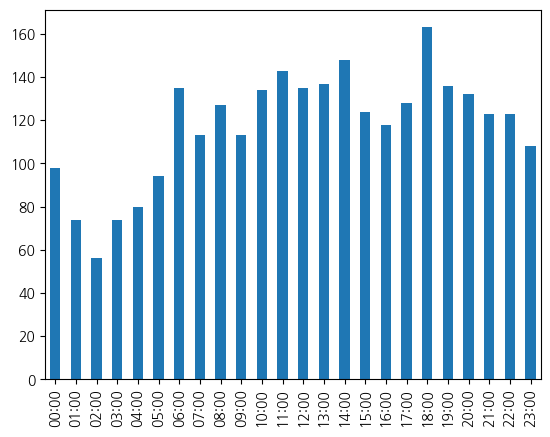

In [141]:
df['발생시간'].value_counts()
df['발생시간'].value_counts().sort_index()
df['발생시간'].value_counts().sort_index().plot.bar()

In [142]:
df['발생시간']=pd.to_datetime(df['발생년월일시']).dt.hour

In [143]:
df['시간대'] = pd.cut(df['발생시간'].astype('int'), [-1, 6, 10, 15, 20, 24],labels=['새벽', '아침', '점심', '저녁', '밤'])

In [144]:
df['시간대']

0       새벽
1       아침
2       점심
3       저녁
4        밤
        ..
2811    저녁
2812    저녁
2813    저녁
2814    저녁
2815     밤
Name: 시간대, Length: 2816, dtype: category
Categories (5, object): ['새벽' < '아침' < '점심' < '저녁' < '밤']

<Axes: >

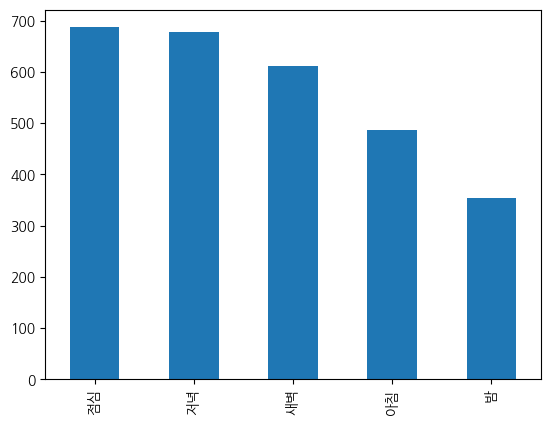

In [145]:
df['시간대'].value_counts().plot.bar()

In [146]:
df['부상자수'].value_counts()

0.0     2170
1.0      396
2.0      122
3.0       63
4.0       22
5.0       16
8.0        6
6.0        4
7.0        4
10.0       3
12.0       2
14.0       2
16.0       2
27.0       1
59.0       1
13.0       1
15.0       1
Name: 부상자수, dtype: int64

In [147]:
df['부상자수'].shift(-3) #자료를 이 만큼 욺기기

0       0.0
1       0.0
2       0.0
3       0.0
4       3.0
       ... 
2811    0.0
2812    0.0
2813    NaN
2814    NaN
2815    NaN
Name: 부상자수, Length: 2816, dtype: float64

In [148]:
df['부상자수'].diff() #열에 있는 값 차이

0       NaN
1      -3.0
2       0.0
3       0.0
4       0.0
       ... 
2811   -1.0
2812    0.0
2813    0.0
2814    0.0
2815    0.0
Name: 부상자수, Length: 2816, dtype: float64

In [149]:
df['부상자수'].cumsum() #cumulative sum

0          3.0
1          3.0
2          3.0
3          3.0
4          3.0
         ...  
2811    1325.0
2812    1325.0
2813    1325.0
2814    1325.0
2815    1325.0
Name: 부상자수, Length: 2816, dtype: float64

In [150]:
df.drop(['시간대'], axis=1).head()
df.loc[:, df.columns.difference(['시간대'])].head()

,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태,발생시간
0,2021-01-01 03:00:00,야,금,3.0,0.0,3.0,경북,군위군,차대차,추돌,교차로,교차로부근,3
1,2021-01-01 09:00:00,주,금,0.0,0.0,0.0,충남,서산시,차량단독,공작물충돌,단일로,기타단일로,9
2,2021-01-01 15:00:00,주,금,0.0,0.0,0.0,강원,강릉시,차대차,측면충돌,교차로,교차로내,15
3,2021-01-01 19:00:00,야,금,0.0,0.0,0.0,전남,진도군,차대사람,횡단중,단일로,기타단일로,19
4,2021-01-01 21:00:00,야,금,0.0,0.0,0.0,경기,수원시,차대사람,기타,단일로,기타단일로,21


,경상자수,도로형태,도로형태_대분류,발생년월일시,발생시간,발생지시군구,발생지시도,부상자수,사고유형_대분류,사고유형_중분류,요일,주야,중상자수
0,3.0,교차로부근,교차로,2021-01-01 03:00:00,3,군위군,경북,3.0,차대차,추돌,금,야,0.0
1,0.0,기타단일로,단일로,2021-01-01 09:00:00,9,서산시,충남,0.0,차량단독,공작물충돌,금,주,0.0
2,0.0,교차로내,교차로,2021-01-01 15:00:00,15,강릉시,강원,0.0,차대차,측면충돌,금,주,0.0
3,0.0,기타단일로,단일로,2021-01-01 19:00:00,19,진도군,전남,0.0,차대사람,횡단중,금,야,0.0
4,0.0,기타단일로,단일로,2021-01-01 21:00:00,21,수원시,경기,0.0,차대사람,기타,금,야,0.0


In [151]:
'시간대' in df.loc[:, df.columns.difference(['시간대'])].columns

False

In [152]:
del df['시간대']

In [153]:
df.drop(2, axis=0).head()
df.drop([2,4], axis=0).head()

,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태,발생시간
0,2021-01-01 03:00:00,야,금,3.0,0.0,3.0,경북,군위군,차대차,추돌,교차로,교차로부근,3
1,2021-01-01 09:00:00,주,금,0.0,0.0,0.0,충남,서산시,차량단독,공작물충돌,단일로,기타단일로,9
3,2021-01-01 19:00:00,야,금,0.0,0.0,0.0,전남,진도군,차대사람,횡단중,단일로,기타단일로,19
4,2021-01-01 21:00:00,야,금,0.0,0.0,0.0,경기,수원시,차대사람,기타,단일로,기타단일로,21
5,2021-01-01 21:00:00,야,금,0.0,0.0,0.0,전남,순천시,차대사람,기타,기타,기타,21


,발생년월일시,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태,발생시간
0,2021-01-01 03:00:00,야,금,3.0,0.0,3.0,경북,군위군,차대차,추돌,교차로,교차로부근,3
1,2021-01-01 09:00:00,주,금,0.0,0.0,0.0,충남,서산시,차량단독,공작물충돌,단일로,기타단일로,9
3,2021-01-01 19:00:00,야,금,0.0,0.0,0.0,전남,진도군,차대사람,횡단중,단일로,기타단일로,19
5,2021-01-01 21:00:00,야,금,0.0,0.0,0.0,전남,순천시,차대사람,기타,기타,기타,21
6,2021-01-01 22:00:00,야,금,0.0,0.0,0.0,충남,천안시,차대사람,횡단중,교차로,교차로부근,22


In [154]:
tf = pd.DataFrame({'A': list('abc'),
'B': [1,2,3],
'C': [4,5,6]})
tf

,A,B,C
0,a,1,4
1,b,2,5
2,c,3,6


In [155]:
pd.melt(tf)
pd.melt(tf, id_vars= ['A'], value_vars=['B'])
tf = pd.melt(tf, id_vars= ['A'], value_vars=['B', 'C'])
tf

,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,2
5,B,3
6,C,4
7,C,5
8,C,6


,A,variable,value
0,a,B,1
1,b,B,2
2,c,B,3


,A,variable,value
0,a,B,1
1,b,B,2
2,c,B,3
3,a,C,4
4,b,C,5
5,c,C,6


In [156]:
tf = tf.pivot(index='A', columns='variable', values ='value')
tf

tf.reset_index()

variable,B,C
A,,
a,1,4
b,2,5
c,3,6


variable,A,B,C
0,a,1,4
1,b,2,5
2,c,3,6


In [157]:
df['발생시간']

0        3
1        9
2       15
3       19
4       21
        ..
2811    16
2812    17
2813    18
2814    19
2815    21
Name: 발생시간, Length: 2816, dtype: int64

In [158]:
df.drop(['발생시간'], axis=1, inplace=True)

In [159]:
'발생시간' in df.columns

False

In [160]:
df.set_index('발생년월일시', inplace=True)

In [161]:
df.head()

,주야,요일,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,도로형태_대분류,도로형태
발생년월일시,,,,,,,,,,,
2021-01-01 03:00:00,야,금,3.0,0.0,3.0,경북,군위군,차대차,추돌,교차로,교차로부근
2021-01-01 09:00:00,주,금,0.0,0.0,0.0,충남,서산시,차량단독,공작물충돌,단일로,기타단일로
2021-01-01 15:00:00,주,금,0.0,0.0,0.0,강원,강릉시,차대차,측면충돌,교차로,교차로내
2021-01-01 19:00:00,야,금,0.0,0.0,0.0,전남,진도군,차대사람,횡단중,단일로,기타단일로
2021-01-01 21:00:00,야,금,0.0,0.0,0.0,경기,수원시,차대사람,기타,단일로,기타단일로


# 데이터 **합치기**

# ****CONCAT****

In [162]:
from IPython.display import display_html

def display_side_by_side(*args):
  html_str=""
  for df in args:
      html_str += df.to_html()
  display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [163]:
def make_df(var, obs):
  data = {c: [str(c) + str(i) for i in obs]
    for c in var}
  return pd.DataFrame(data, obs)


In [164]:
display_side_by_side(make_df('ABCD', [0,1,2,3]), make_df('012', ['A','B']), make_df('ACEGIJ', [1,3,5,7,9]))

A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 0 
 1 
 2 
 
 
 
 
 A 
 0A 
 1A 
 2A 
 
 
 B 
 0B 
 1B 
 2B 
 
 
 
 
 
 
 A 
 C 
 E 
 G 
 I 
 J 
 
 
 
 
 1 
 A1 
 C1 
 E1 
 G1 
 I1 
 J1 
 
 
 3 
 A3 
 C3 
 E3 
 G3 
 I3 
 J3 
 
 
 5 
 A5 
 C5 
 E5 
 G5 
 I5 
 J5 
 
 
 7 
 A7 
 C7 
 E7 
 G7 
 I7 
 J7 
 
 
 9 
 A9 
 C9 
 E9 
 G9 
 I9 
 J9

In [165]:
df1 = make_df('ABCD', [0,1,2,3])
df2=make_df('DEFG',[1,2,3,4])

In [166]:
display_side_by_side(df1, df2, pd.concat([df1, df1]))

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
,D,E,F,G
1,D1,E1,F1,G1
2,D2,E2,F2,G2
3,D3,E3,F3,G3
4,D4,E4,F4,G4
,A,B,C,D


In [167]:
display_side_by_side(df1, df1, pd.concat([df1, df1], axis=1))

A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 A3 
 B3 
 C3 
 D3

In [168]:
display_side_by_side(df1, df2, pd.concat([df1, df2]))

A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 D 
 E 
 F 
 G 
 
 
 
 
 1 
 D1 
 E1 
 F1 
 G1 
 
 
 2 
 D2 
 E2 
 F2 
 G2 
 
 
 3 
 D3 
 E3 
 F3 
 G3 
 
 
 4 
 D4 
 E4 
 F4 
 G4 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 E 
 F 
 G 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 NaN 
 NaN 
 NaN 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 NaN 
 NaN 
 NaN 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 NaN 
 NaN 
 NaN 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 NaN 
 NaN 
 NaN 
 
 
 1 
 NaN 
 NaN 
 NaN 
 D1 
 E1 
 F1 
 G1 
 
 
 2 
 NaN 
 NaN 
 NaN 
 D2 
 E2 
 F2 
 G2 
 
 
 3 
 NaN 
 NaN 
 NaN 
 D3 
 E3 
 F3 
 G3 
 
 
 4 
 NaN 
 NaN 
 NaN 
 D4 
 E4 
 F4 
 G4

In [169]:
display_side_by_side(df1, df2, pd.concat([df1, df2],ignore_index=True)) # index 1 2 3 4 1 2 3 4 대신에 새로운 index

A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 D 
 E 
 F 
 G 
 
 
 
 
 1 
 D1 
 E1 
 F1 
 G1 
 
 
 2 
 D2 
 E2 
 F2 
 G2 
 
 
 3 
 D3 
 E3 
 F3 
 G3 
 
 
 4 
 D4 
 E4 
 F4 
 G4 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 E 
 F 
 G 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 NaN 
 NaN 
 NaN 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 NaN 
 NaN 
 NaN 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 NaN 
 NaN 
 NaN 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 NaN 
 NaN 
 NaN 
 
 
 4 
 NaN 
 NaN 
 NaN 
 D1 
 E1 
 F1 
 G1 
 
 
 5 
 NaN 
 NaN 
 NaN 
 D2 
 E2 
 F2 
 G2 
 
 
 6 
 NaN 
 NaN 
 NaN 
 D3 
 E3 
 F3 
 G3 
 
 
 7 
 NaN 
 NaN 
 NaN 
 D4 
 E4 
 F4 
 G4

In [170]:
display_side_by_side(df1, df2, pd.concat([df1, df2], axis=1))

A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 D 
 E 
 F 
 G 
 
 
 
 
 1 
 D1 
 E1 
 F1 
 G1 
 
 
 2 
 D2 
 E2 
 F2 
 G2 
 
 
 3 
 D3 
 E3 
 F3 
 G3 
 
 
 4 
 D4 
 E4 
 F4 
 G4 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 D 
 E 
 F 
 G 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 D1 
 E1 
 F1 
 G1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 D2 
 E2 
 F2 
 G2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 D3 
 E3 
 F3 
 G3 
 
 
 4 
 NaN 
 NaN 
 NaN 
 NaN 
 D4 
 E4 
 F4 
 G4

In [171]:
display_side_by_side(df1, df2, pd.concat([df1, df2], join='inner'))

A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 D 
 E 
 F 
 G 
 
 
 
 
 1 
 D1 
 E1 
 F1 
 G1 
 
 
 2 
 D2 
 E2 
 F2 
 G2 
 
 
 3 
 D3 
 E3 
 F3 
 G3 
 
 
 4 
 D4 
 E4 
 F4 
 G4 
 
 
 
 
 
 
 D 
 
 
 
 
 0 
 D0 
 
 
 1 
 D1 
 
 
 2 
 D2 
 
 
 3 
 D3 
 
 
 1 
 D1 
 
 
 2 
 D2 
 
 
 3 
 D3 
 
 
 4 
 D4

In [172]:
display_side_by_side(df1, df2, pd.concat([df1, df2], axis=1, join='inner'))


A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 D 
 E 
 F 
 G 
 
 
 
 
 1 
 D1 
 E1 
 F1 
 G1 
 
 
 2 
 D2 
 E2 
 F2 
 G2 
 
 
 3 
 D3 
 E3 
 F3 
 G3 
 
 
 4 
 D4 
 E4 
 F4 
 G4 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 D 
 E 
 F 
 G 
 
 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 D1 
 E1 
 F1 
 G1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 D2 
 E2 
 F2 
 G2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 D3 
 E3 
 F3 
 G3

In [173]:
display_side_by_side(df1.set_index('D'), df2.set_index('D'),pd.concat([df1.set_index('D'), df2.set_index('D')], axis=1))

,A,B,C
D,,,
D0,A0,B0,C0
D1,A1,B1,C1
D2,A2,B2,C2
D3,A3,B3,C3
,E,F,G
D,,,
D1,E1,F1,G1
D2,E2,F2,G2
D3,E3,F3,G3


In [174]:
display_side_by_side(df1, df1, df1.append(df1)) #concat([df1,df1])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
,A,B,C,D


# **MERGE**

In [175]:
display_side_by_side(df1,df2,pd.merge(df1, df2))
df3=pd.merge(df1, df2)

A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 D 
 E 
 F 
 G 
 
 
 
 
 1 
 D1 
 E1 
 F1 
 G1 
 
 
 2 
 D2 
 E2 
 F2 
 G2 
 
 
 3 
 D3 
 E3 
 F3 
 G3 
 
 
 4 
 D4 
 E4 
 F4 
 G4 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 E 
 F 
 G 
 
 
 
 
 0 
 A1 
 B1 
 C1 
 D1 
 E1 
 F1 
 G1 
 
 
 1 
 A2 
 B2 
 C2 
 D2 
 E2 
 F2 
 G2 
 
 
 2 
 A3 
 B3 
 C3 
 D3 
 E3 
 F3 
 G3

In [176]:
df4 = make_df('DHIJ', [0,1,1,2,2,3])
df5 = pd.merge(df3, df4)
display_side_by_side(df3,df4,pd.merge(df3,df4))

A 
 B 
 C 
 D 
 E 
 F 
 G 
 
 
 
 
 0 
 A1 
 B1 
 C1 
 D1 
 E1 
 F1 
 G1 
 
 
 1 
 A2 
 B2 
 C2 
 D2 
 E2 
 F2 
 G2 
 
 
 2 
 A3 
 B3 
 C3 
 D3 
 E3 
 F3 
 G3 
 
 
 
 
 
 
 D 
 H 
 I 
 J 
 
 
 
 
 0 
 D0 
 H0 
 I0 
 J0 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 3 
 D3 
 H3 
 I3 
 J3 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 E 
 F 
 G 
 H 
 I 
 J 
 
 
 
 
 0 
 A1 
 B1 
 C1 
 D1 
 E1 
 F1 
 G1 
 H1 
 I1 
 J1 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 E1 
 F1 
 G1 
 H1 
 I1 
 J1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 E2 
 F2 
 G2 
 H2 
 I2 
 J2 
 
 
 3 
 A2 
 B2 
 C2 
 D2 
 E2 
 F2 
 G2 
 H2 
 I2 
 J2 
 
 
 4 
 A3 
 B3 
 C3 
 D3 
 E3 
 F3 
 G3 
 H3 
 I3 
 J3

In [177]:
display_side_by_side(df4,df3,pd.merge(df4,df3)) # df4.merge(df3)

D 
 H 
 I 
 J 
 
 
 
 
 0 
 D0 
 H0 
 I0 
 J0 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 3 
 D3 
 H3 
 I3 
 J3 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 E 
 F 
 G 
 
 
 
 
 0 
 A1 
 B1 
 C1 
 D1 
 E1 
 F1 
 G1 
 
 
 1 
 A2 
 B2 
 C2 
 D2 
 E2 
 F2 
 G2 
 
 
 2 
 A3 
 B3 
 C3 
 D3 
 E3 
 F3 
 G3 
 
 
 
 
 
 
 D 
 H 
 I 
 J 
 A 
 B 
 C 
 E 
 F 
 G 
 
 
 
 
 0 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 C1 
 E1 
 F1 
 G1 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 C1 
 E1 
 F1 
 G1 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 C2 
 E2 
 F2 
 G2 
 
 
 3 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 C2 
 E2 
 F2 
 G2 
 
 
 4 
 D3 
 H3 
 I3 
 J3 
 A3 
 B3 
 C3 
 E3 
 F3 
 G3

In [178]:
display_side_by_side(df4,df5,pd.merge(df4,df5))

D 
 H 
 I 
 J 
 
 
 
 
 0 
 D0 
 H0 
 I0 
 J0 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 3 
 D3 
 H3 
 I3 
 J3 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 E 
 F 
 G 
 H 
 I 
 J 
 
 
 
 
 0 
 A1 
 B1 
 C1 
 D1 
 E1 
 F1 
 G1 
 H1 
 I1 
 J1 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 E1 
 F1 
 G1 
 H1 
 I1 
 J1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 E2 
 F2 
 G2 
 H2 
 I2 
 J2 
 
 
 3 
 A2 
 B2 
 C2 
 D2 
 E2 
 F2 
 G2 
 H2 
 I2 
 J2 
 
 
 4 
 A3 
 B3 
 C3 
 D3 
 E3 
 F3 
 G3 
 H3 
 I3 
 J3 
 
 
 
 
 
 
 D 
 H 
 I 
 J 
 A 
 B 
 C 
 E 
 F 
 G 
 
 
 
 
 0 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 C1 
 E1 
 F1 
 G1 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 C1 
 E1 
 F1 
 G1 
 
 
 2 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 C1 
 E1 
 F1 
 G1 
 
 
 3 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 C1 
 E1 
 F1 
 G1 
 
 
 4 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 C2 
 E2 
 F2 
 G2 
 
 
 5 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 C2 
 E2 
 F2 
 G2 
 
 
 6 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 C2 
 E2 
 F2 
 G2 
 
 
 7 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 C2 
 E2 
 F2 
 G2 
 
 
 8 
 D3 
 H3 
 I3 
 J3 
 A3 
 B3 
 C3 
 E3 
 F3 
 G3

In [179]:
display_side_by_side(df4, df5, pd.merge(df4, df5, how = 'left'))

D 
 H 
 I 
 J 
 
 
 
 
 0 
 D0 
 H0 
 I0 
 J0 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 3 
 D3 
 H3 
 I3 
 J3 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 E 
 F 
 G 
 H 
 I 
 J 
 
 
 
 
 0 
 A1 
 B1 
 C1 
 D1 
 E1 
 F1 
 G1 
 H1 
 I1 
 J1 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 E1 
 F1 
 G1 
 H1 
 I1 
 J1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 E2 
 F2 
 G2 
 H2 
 I2 
 J2 
 
 
 3 
 A2 
 B2 
 C2 
 D2 
 E2 
 F2 
 G2 
 H2 
 I2 
 J2 
 
 
 4 
 A3 
 B3 
 C3 
 D3 
 E3 
 F3 
 G3 
 H3 
 I3 
 J3 
 
 
 
 
 
 
 D 
 H 
 I 
 J 
 A 
 B 
 C 
 E 
 F 
 G 
 
 
 
 
 0 
 D0 
 H0 
 I0 
 J0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 C1 
 E1 
 F1 
 G1 
 
 
 2 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 C1 
 E1 
 F1 
 G1 
 
 
 3 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 C1 
 E1 
 F1 
 G1 
 
 
 4 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 C1 
 E1 
 F1 
 G1 
 
 
 5 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 C2 
 E2 
 F2 
 G2 
 
 
 6 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 C2 
 E2 
 F2 
 G2 
 
 
 7 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 C2 
 E2 
 F2 
 G2 
 
 
 8 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 C2 
 E2 
 F2 
 G2 
 
 
 9 
 D3 
 H3 
 I3 
 J3 
 A3 
 B3 
 C3 
 E3 
 F3 
 G3

In [180]:
df6= df5[['A', 'B', 'D', 'H', 'I']]
display_side_by_side(df4, df6, pd.merge(df4, df6, on =['D', 'H']))


D 
 H 
 I 
 J 
 
 
 
 
 0 
 D0 
 H0 
 I0 
 J0 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 3 
 D3 
 H3 
 I3 
 J3 
 
 
 
 
 
 
 A 
 B 
 D 
 H 
 I 
 
 
 
 
 0 
 A1 
 B1 
 D1 
 H1 
 I1 
 
 
 1 
 A1 
 B1 
 D1 
 H1 
 I1 
 
 
 2 
 A2 
 B2 
 D2 
 H2 
 I2 
 
 
 3 
 A2 
 B2 
 D2 
 H2 
 I2 
 
 
 4 
 A3 
 B3 
 D3 
 H3 
 I3 
 
 
 
 
 
 
 D 
 H 
 I_x 
 J 
 A 
 B 
 I_y 
 
 
 
 
 0 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 I1 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 I1 
 
 
 2 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 I1 
 
 
 3 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 I1 
 
 
 4 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 I2 
 
 
 5 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 I2 
 
 
 6 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 I2 
 
 
 7 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 I2 
 
 
 8 
 D3 
 H3 
 I3 
 J3 
 A3 
 B3 
 I3

In [181]:
df6= df5[['A', 'B', 'D', 'H', 'I']]
display_side_by_side(df4, df6, pd.merge(df4, df6, on =['D', 'H'], suffixes=('_왼쪽', '_오른쪽')))

D 
 H 
 I 
 J 
 
 
 
 
 0 
 D0 
 H0 
 I0 
 J0 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 2 
 D2 
 H2 
 I2 
 J2 
 
 
 3 
 D3 
 H3 
 I3 
 J3 
 
 
 
 
 
 
 A 
 B 
 D 
 H 
 I 
 
 
 
 
 0 
 A1 
 B1 
 D1 
 H1 
 I1 
 
 
 1 
 A1 
 B1 
 D1 
 H1 
 I1 
 
 
 2 
 A2 
 B2 
 D2 
 H2 
 I2 
 
 
 3 
 A2 
 B2 
 D2 
 H2 
 I2 
 
 
 4 
 A3 
 B3 
 D3 
 H3 
 I3 
 
 
 
 
 
 
 D 
 H 
 I_왼쪽 
 J 
 A 
 B 
 I_오른쪽 
 
 
 
 
 0 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 I1 
 
 
 1 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 I1 
 
 
 2 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 I1 
 
 
 3 
 D1 
 H1 
 I1 
 J1 
 A1 
 B1 
 I1 
 
 
 4 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 I2 
 
 
 5 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 I2 
 
 
 6 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 I2 
 
 
 7 
 D2 
 H2 
 I2 
 J2 
 A2 
 B2 
 I2 
 
 
 8 
 D3 
 H3 
 I3 
 J3 
 A3 
 B3 
 I3

In [182]:
display_side_by_side(df1, df6, pd.merge(df1, df6, on=['D']))

A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 A 
 B 
 D 
 H 
 I 
 
 
 
 
 0 
 A1 
 B1 
 D1 
 H1 
 I1 
 
 
 1 
 A1 
 B1 
 D1 
 H1 
 I1 
 
 
 2 
 A2 
 B2 
 D2 
 H2 
 I2 
 
 
 3 
 A2 
 B2 
 D2 
 H2 
 I2 
 
 
 4 
 A3 
 B3 
 D3 
 H3 
 I3 
 
 
 
 
 
 
 A_x 
 B_x 
 C 
 D 
 A_y 
 B_y 
 H 
 I 
 
 
 
 
 0 
 A1 
 B1 
 C1 
 D1 
 A1 
 B1 
 H1 
 I1 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 A1 
 B1 
 H1 
 I1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 A2 
 B2 
 H2 
 I2 
 
 
 3 
 A2 
 B2 
 C2 
 D2 
 A2 
 B2 
 H2 
 I2 
 
 
 4 
 A3 
 B3 
 C3 
 D3 
 A3 
 B3 
 H3 
 I3

In [183]:
df6['J'] = df1['A']; df7 = df6[['H', 'J']]
display_side_by_side(df1, df7, pd.merge(df1, df7, left_on='A', right_on='J'))

A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 H 
 J 
 
 
 
 
 0 
 H1 
 A0 
 
 
 1 
 H1 
 A1 
 
 
 2 
 H2 
 A2 
 
 
 3 
 H2 
 A3 
 
 
 4 
 H3 
 NaN 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 H 
 J 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 H1 
 A0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 H1 
 A1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 H2 
 A2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 H2 
 A3

# NaN Values, Outliers, Duplicates

In [184]:
df = pd.DataFrame(np.random.randn(5, 3),
index=list('acefh'),
columns=["one", "two", "three"])

In [185]:
df['four'] = 'bar'

In [186]:
df['five'] = df['one'] > 0

In [187]:
df

,one,two,three,four,five
a,-0.51,-1.62,0.71,bar,False
c,-1.12,1.41,0.16,bar,False
e,1.67,0.39,1.34,bar,True
f,-0.38,-0.82,1.10,bar,False
h,0.36,-0.35,-1.01,bar,True


In [188]:
df2 = df.reindex(list('abcdefgh'))

In [189]:
df2

,one,two,three,four,five
a,-0.51,-1.62,0.71,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-1.12,1.41,0.16,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,1.67,0.39,1.34,bar,True
f,-0.38,-0.82,1.10,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,0.36,-0.35,-1.01,bar,True


In [190]:
for i in range(5):
  (i, j) = np.random.randint(8), np.random.randint(5)
  df2.iloc[i, j] = np.nan
df2

,one,two,three,four,five
a,-0.51,-1.62,0.71,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,0.16,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,1.67,0.39,1.34,bar,True
f,-0.38,-0.82,1.10,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,0.36,-0.35,-1.01,bar,True


In [191]:
df2.isnull().sum()

one      4
two      4
three    3
four     3
five     3
dtype: int64

In [192]:
df2['one'].value_counts(normalize=True,dropna=False)

 NaN     0.50
-0.51    0.12
 1.67    0.12
-0.38    0.12
 0.36    0.12
Name: one, dtype: float64

In [193]:
df2.shape

(8, 5)

In [194]:
df2.dropna(how='any').shape

(4, 5)

In [195]:
df2.dropna(how='all').shape

(5, 5)

In [196]:
df2.dropna(subset=['one', 'five'], how='all').shape

(5, 5)

In [197]:
df2.dropna(subset=['one', 'five'], how='any').shape

(4, 5)

Fillna

In [198]:
df2.fillna('missing')


,one,two,three,four,five
a,-0.51,-1.62,0.71,bar,False
b,missing,missing,missing,missing,missing
c,missing,missing,0.16,bar,False
d,missing,missing,missing,missing,missing
e,1.67,0.39,1.34,bar,True
f,-0.38,-0.82,1.1,bar,False
g,missing,missing,missing,missing,missing
h,0.36,-0.35,-1.01,bar,True


In [199]:
df2['one'].fillna(df2['one'].mean())

a   -0.51
b    0.29
c    0.29
d    0.29
e    1.67
f   -0.38
g    0.29
h    0.36
Name: one, dtype: float64

Duplicates

In [200]:
np.random.seed(321)
df = pd.DataFrame({'동전': np.random.choice(['앞', '뒤'], 20),
'주사위': np.random.choice(range(1,7), 20)})
df
df.shape

,동전,주사위
0,앞,6
1,앞,6
2,앞,4
3,뒤,3
4,뒤,6
5,앞,3
6,뒤,3
7,앞,4
8,앞,2
9,앞,3


(20, 2)

In [201]:
df.duplicated().sum()

10

In [202]:
df[df.duplicated()]

,동전,주사위
1,앞,6
6,뒤,3
7,앞,4
9,앞,3
12,앞,6
14,뒤,3
15,뒤,6
16,뒤,3
17,뒤,2
18,앞,2


In [203]:
df['동전'].duplicated().sum()

18

In [204]:
df.duplicated(keep ='first')

0     False
1      True
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9      True
10    False
11    False
12     True
13    False
14     True
15     True
16     True
17     True
18     True
19    False
dtype: bool

In [205]:
df.duplicated(keep ='last')


0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9     False
10    False
11     True
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [206]:
df[df.duplicated(keep ='first')]

,동전,주사위
1,앞,6
6,뒤,3
7,앞,4
9,앞,3
12,앞,6
14,뒤,3
15,뒤,6
16,뒤,3
17,뒤,2
18,앞,2


In [207]:
df[df.duplicated(keep ='last')]

,동전,주사위
0,앞,6
1,앞,6
2,앞,4
3,뒤,3
4,뒤,6
5,앞,3
6,뒤,3
8,앞,2
11,뒤,2
14,뒤,3


In [208]:
df[~df.duplicated()].shape


(10, 2)

**'~'** 로 데이터 제거

In [209]:
df[~df.duplicated()] #중복값을 빼고

,동전,주사위
0,앞,6
2,앞,4
3,뒤,3
4,뒤,6
5,앞,3
8,앞,2
10,앞,5
11,뒤,2
13,뒤,4
19,앞,1


In [210]:
df.drop_duplicates(keep='first')


,동전,주사위
0,앞,6
2,앞,4
3,뒤,3
4,뒤,6
5,앞,3
8,앞,2
10,앞,5
11,뒤,2
13,뒤,4
19,앞,1


In [211]:
df.drop_duplicates(subset=['동전', '주사위'], keep='first').shape

(10, 2)